In [21]:
from src.utils.code_files.common_utils import read_params
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

#configs

configs=read_params("params.yaml")

cars_data_clean_path=configs['data_dir']['cars_data_clean']
cars_data_clean=pd.read_csv(cars_data_clean_path)


cars_details_merge_path=configs['data_dir']['cars_details_merge']
cars_details_merge=pd.read_csv(cars_details_merge_path)

feature_dictionary_path=configs['data_dir']['feature_dictionary']
feature_dictionary=pd.read_csv(feature_dictionary_path)

C:\Users\arnab\AppData\Local\Temp\ipykernel_9328\3564409911.py:17: DtypeWarning: Columns (25,43) have mixed types. Specify dtype option on import or set low_memory=False.
  cars_details_merge=pd.read_csv(cars_details_merge_path)


In [126]:
print(cars_details_merge.shape)
print(cars_data_clean.shape)

print(cars_details_merge.columns)
print(cars_data_clean.columns)

(37814, 140)
(37814, 53)
Index(['position', 'loc', 'myear', 'bt', 'tt', 'ft', 'km', 'ip', 'pi',
       'images',
       ...
       'owner_type', 'price_segment_new', 'template_name_new', 'page_template',
       'template_Type_new', 'experiment', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object', length=140)
Index(['location', 'Manufactured_Year', 'Body_Type', 'Transmission_Type',
       'Fuel_Type', 'km', 'Insurance_Premium', 'Listed_Price', 'discountValue',
       'Car_Seller_Type', 'carType', 'top_features', 'comfort_features',
       'interior_features', 'exterior_features', 'safety_features', 'Color',
       'Engine Type', 'Displacement', 'Max Power', 'Max Torque',
       'No of Cylinder', 'Valves_Per_Cylinder', 'Valve_Config',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Seating Capacity', '

### Drop columns which has more than half of its rows missing

In [127]:
thresh=18907
null_counts = cars_details_merge.isnull().sum()

# Filter columns that have null counts greater than the threshold
columns_to_drop = null_counts[null_counts > thresh].index

# Drop those columns from the DataFrame
cars_details_merge = cars_details_merge.drop(columns=columns_to_drop)

### Null values

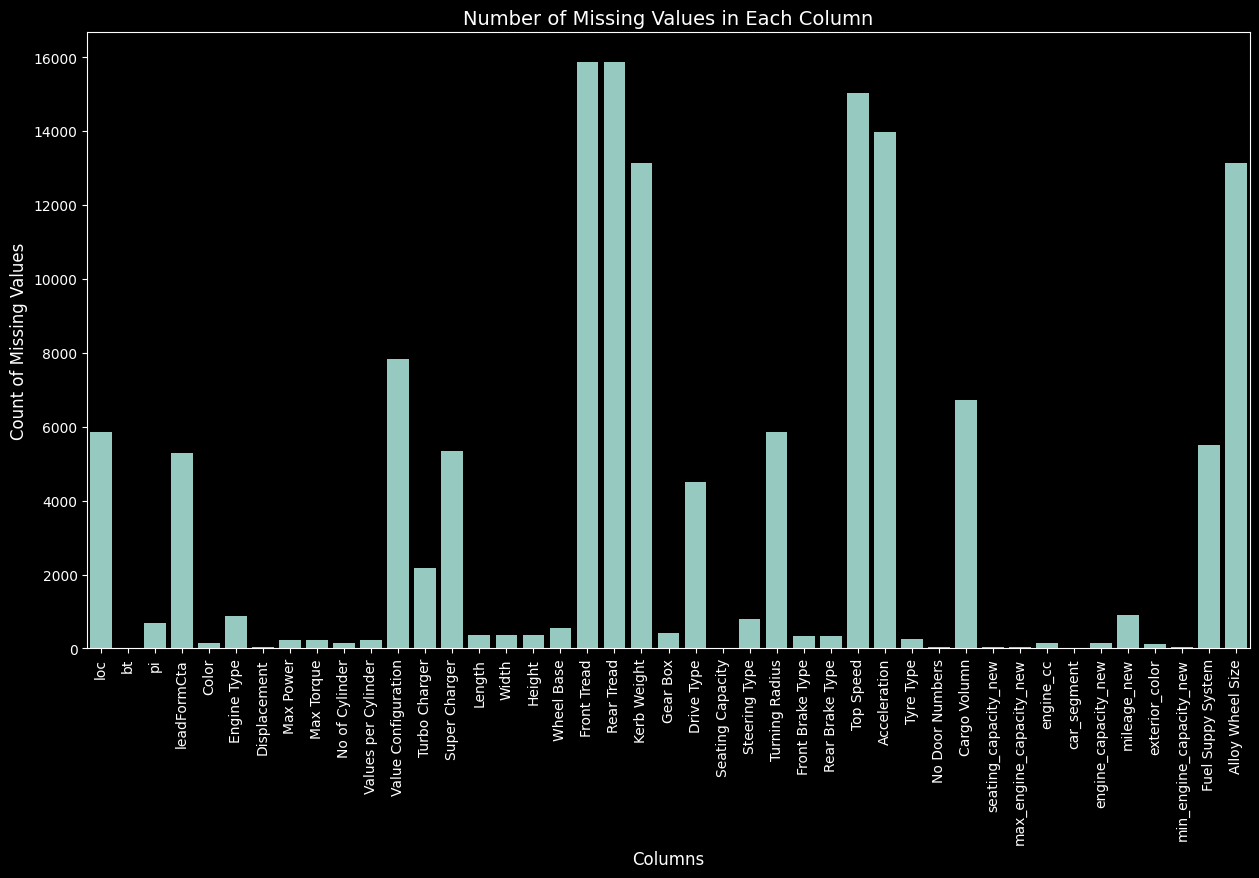

In [128]:
null_counts = cars_details_merge.isna().sum()

# Convert the Series to a DataFrame for better compatibility with Seaborn
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']
null_counts_df=null_counts_df[null_counts_df['Null Count']>0]

# Plot using Seaborn with increased figure size and decreased font size

plt.style.use('dark_background')
plt.figure(figsize=(15, 8))  # Increase figure size
sns.barplot(x='Column', y='Null Count', data=null_counts_df)
plt.xticks(rotation=90, fontsize=10)  # Decrease font size
plt.yticks(fontsize=10)  # Decrease font size for y-axis
plt.title('Number of Missing Values in Each Column', fontsize=14)  # Title font size
plt.xlabel('Columns', fontsize=12)  # X-axis label font size
plt.ylabel('Count of Missing Values', fontsize=12)  # Y-axis label font size

plt.savefig('artifacts/plots/cars_details_missing_values.jpg', format='jpg')
plt.show()



In [129]:
feature_dictionary=feature_dictionary[feature_dictionary['Feature'].isin(list(cars_details_merge.columns))]
feature_dictionary=feature_dictionary[['Feature','Description']]


output_file_path = 'artifacts/used_feature_description/used_feature_descriptions.txt'

with open(output_file_path,'w') as f:
    for row in range(feature_dictionary.shape[0]):
        f.write(f"feature name: {feature_dictionary.iloc[row,0]} \n")
        f.write(f"Description: {feature_dictionary.iloc[row,1]} \n\n")
    f.close()


In [130]:
cars_details_merge[['template_name_new']]

,template_name_new
0,used cardetail v2/corporate/13
1,used cardetail v2/corporate/13
2,used cardetail v2/corporate/13
3,used cardetail v2/corporate/13
4,used cardetail v2
...,...
37809,used cardetail v2
37810,used cardetail v2
37811,used cardetail v2
37812,used cardetail v2


In [131]:
cars_details_merge['leadFormCta']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4        View Seller Details
                ...         
37809                    NaN
37810    View Seller Details
37811    View Seller Details
37812    View Seller Details
37813    View Seller Details
Name: leadFormCta, Length: 37814, dtype: object

In [132]:
cars_details_merge=cars_details_merge.drop(columns=['position','images','imgCount','modelId'
                                 ,'vid','centralVariantId','vlink','pageNo','views'
                                 ,'usedCarId','usedCarSkuId','ucid','sid'
                                 ,'tmGaadiStore','emiwidget','dynx_itemid_x'
                                 ,'dynx_itemid2_x','leadForm','leadFormCta',
                                 'compare','pageType','corporateId','page_title','model_id_new','dealer_id_new','city_id_new',
                                 'page_type','dealer_id','dynx_event','dynx_pagetype','dynx_itemid_y','dynx_itemid2_y',
                                 'dynx_totalvalue_y','template_name_new','page_template','template_Type_new','experiment','dynx_totalvalue_x','pi','threesixty'
                                 ,'city_y','msp','city_x','oem_name','exterior_color','used_carid','variant_name','variant_new','city_name_new','model_name','model_type_new','body_type_new'
                                 ],axis=1)

In [133]:
columns_to_drop = []
columns_to_rename = {}

for col in cars_details_merge.columns:
    if col.endswith('_new'):
        original_col = col[:-4]
        if original_col in cars_details_merge.columns:
            if cars_details_merge[original_col].equals(cars_details_merge[col]):
                columns_to_drop.append(original_col)
                print(f"Deleted column: {original_col}")
            else:
                print(f"Values do not match for column: {original_col}")
        columns_to_rename[col] = original_col

cars_details_merge.drop(columns=columns_to_drop,axis=1,inplace=True)

cars_details_merge.rename(columns=columns_to_rename, inplace=True)


cars_details_merge.rename(columns={"loc": "location", "myear": "Manufactured_Year",
                                   "bt":"Body_Type",'tt':'Transmission_Type',
                                   "ft":"Fuel_Type","ip":"Insurance_Premium",
                                   "No Door Numbers":"Num_Doors","pu":"Purchase_Price",'Value Configuration':"Valve_Config",
                                   "Values per Cylinder":"Valves_Per_Cylinder"
                                   },inplace=True)


Deleted column: model_year
Deleted column: transmission_type
Deleted column: model
Deleted column: fuel_type
Deleted column: owner_type
Deleted column: price_segment


In [134]:
columns_to_rename

{'seller_type_new': 'seller_type',
 'seating_capacity_new': 'seating_capacity',
 'model_year_new': 'model_year',
 'car_type_new': 'car_type',
 'max_engine_capacity_new': 'max_engine_capacity',
 'transmission_type_new': 'transmission_type',
 'model_new': 'model',
 'vehicle_type_new': 'vehicle_type',
 'fuel_type_new': 'fuel_type',
 'engine_capacity_new': 'engine_capacity',
 'owner_type_new': 'owner_type',
 'mileage_new': 'mileage',
 'brand_new': 'brand',
 'min_engine_capacity_new': 'min_engine_capacity',
 'price_segment_new': 'price_segment'}

In [135]:
cars_details_merge.columns

Index(['location', 'Manufactured_Year', 'Body_Type', 'Transmission_Type',
       'Fuel_Type', 'km', 'Insurance_Premium', 'dvn', 'oem', 'variantName',
       'price', 'Purchase_Price', 'discountValue', 'utype', 'transmissionType',
       'offers', 'carType', 'top_features', 'comfort_features',
       'interior_features', 'exterior_features', 'safety_features', 'Color',
       'Engine Type', 'Displacement', 'Max Power', 'Max Torque',
       'No of Cylinder', 'Valves_Per_Cylinder', 'Valve_Config',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Num_Doors', 'Cargo Volumn', 'seller_type',
       'seating_capacity', 'model_year', 'car_type', 'price_range_segment',
       'state', 'max_engine_capacity', 'transmission_type', 'k

In [136]:
cars_details_merge[['Cargo Volumn']]

,Cargo Volumn
0,180-liters
1,235-litres
2,400-litres
3,NaN
4,NaN
...,...
37809,350
37810,460-litre
37811,345
37812,220-litres


# EDA

In [137]:
cars_data_clean.columns

Index(['location', 'Manufactured_Year', 'Body_Type', 'Transmission_Type',
       'Fuel_Type', 'km', 'Insurance_Premium', 'Listed_Price', 'discountValue',
       'Car_Seller_Type', 'carType', 'top_features', 'comfort_features',
       'interior_features', 'exterior_features', 'safety_features', 'Color',
       'Engine Type', 'Displacement', 'Max Power', 'Max Torque',
       'No of Cylinder', 'Valves_Per_Cylinder', 'Valve_Config',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Num_Doors', 'Cargo_Volume', 'state', 'model',
       'brand_name', 'engine_capacity', 'owner_type', 'mileage',
       'Fuel Suppy System', 'Alloy Wheel Size'],
      dtype='object')

In [138]:
cars_data_clean[['state','location']]

,state,location
0,uttar pradesh,Gomti Nagar
1,maharashtra,Borivali West
2,delhi,JASOLA
3,delhi,jasola
4,maharashtra,mumbai g.p.o.
...,...,...
37809,maharashtra,Thathawade
37810,maharashtra,Kharadi
37811,maharashtra,kothrud
37812,maharashtra,kothrud


### Q1 Which State/Union Territory has most amount of used cars selling

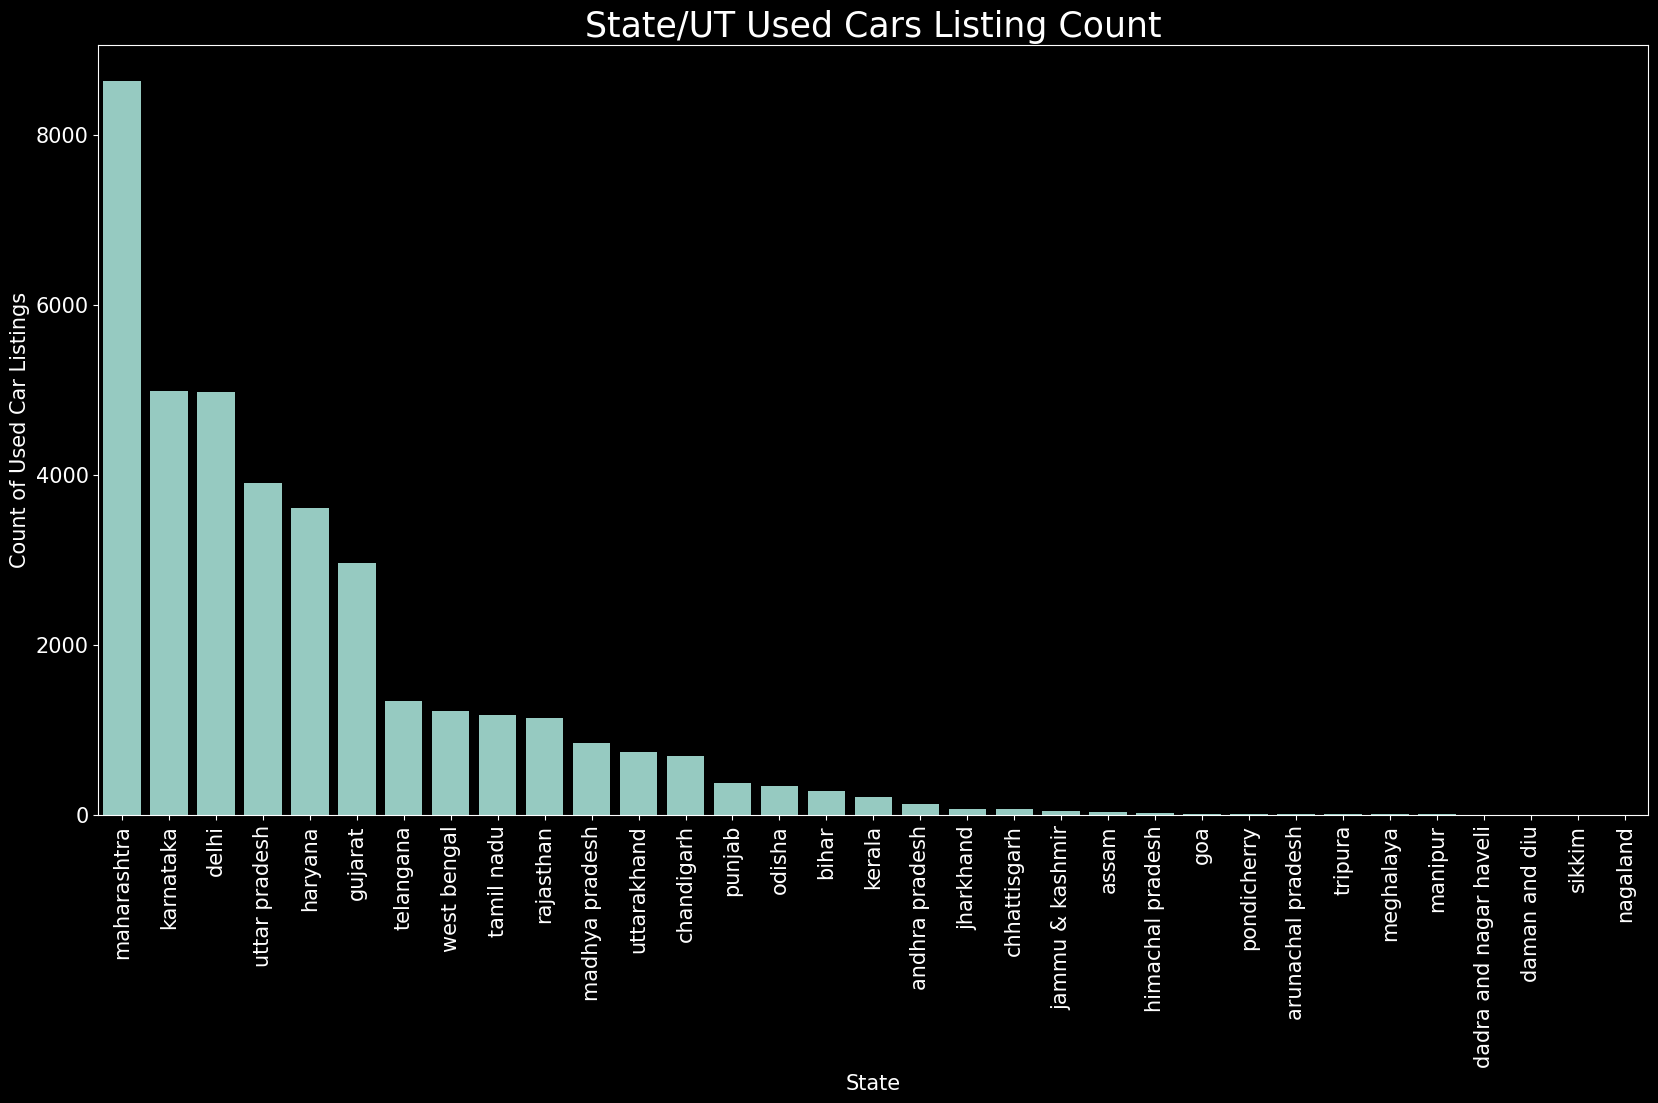

In [139]:
state_ut_count=pd.DataFrame(cars_data_clean['state'].value_counts()).reset_index()

plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='state', y='count', data=state_ut_count)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('State/UT Used Cars Listing Count', fontsize=25)
plt.xlabel('State', fontsize=15) 
plt.ylabel('Count of Used Car Listings', fontsize=15)

plt.savefig('artifacts/plots/State_UT_Used_Cars_Listing_Count.jpg', format='jpg')
plt.show()

#Maharashtra has highest count


### Q2 Which City/District in Maharashtra has most listings of used cars (top 10)

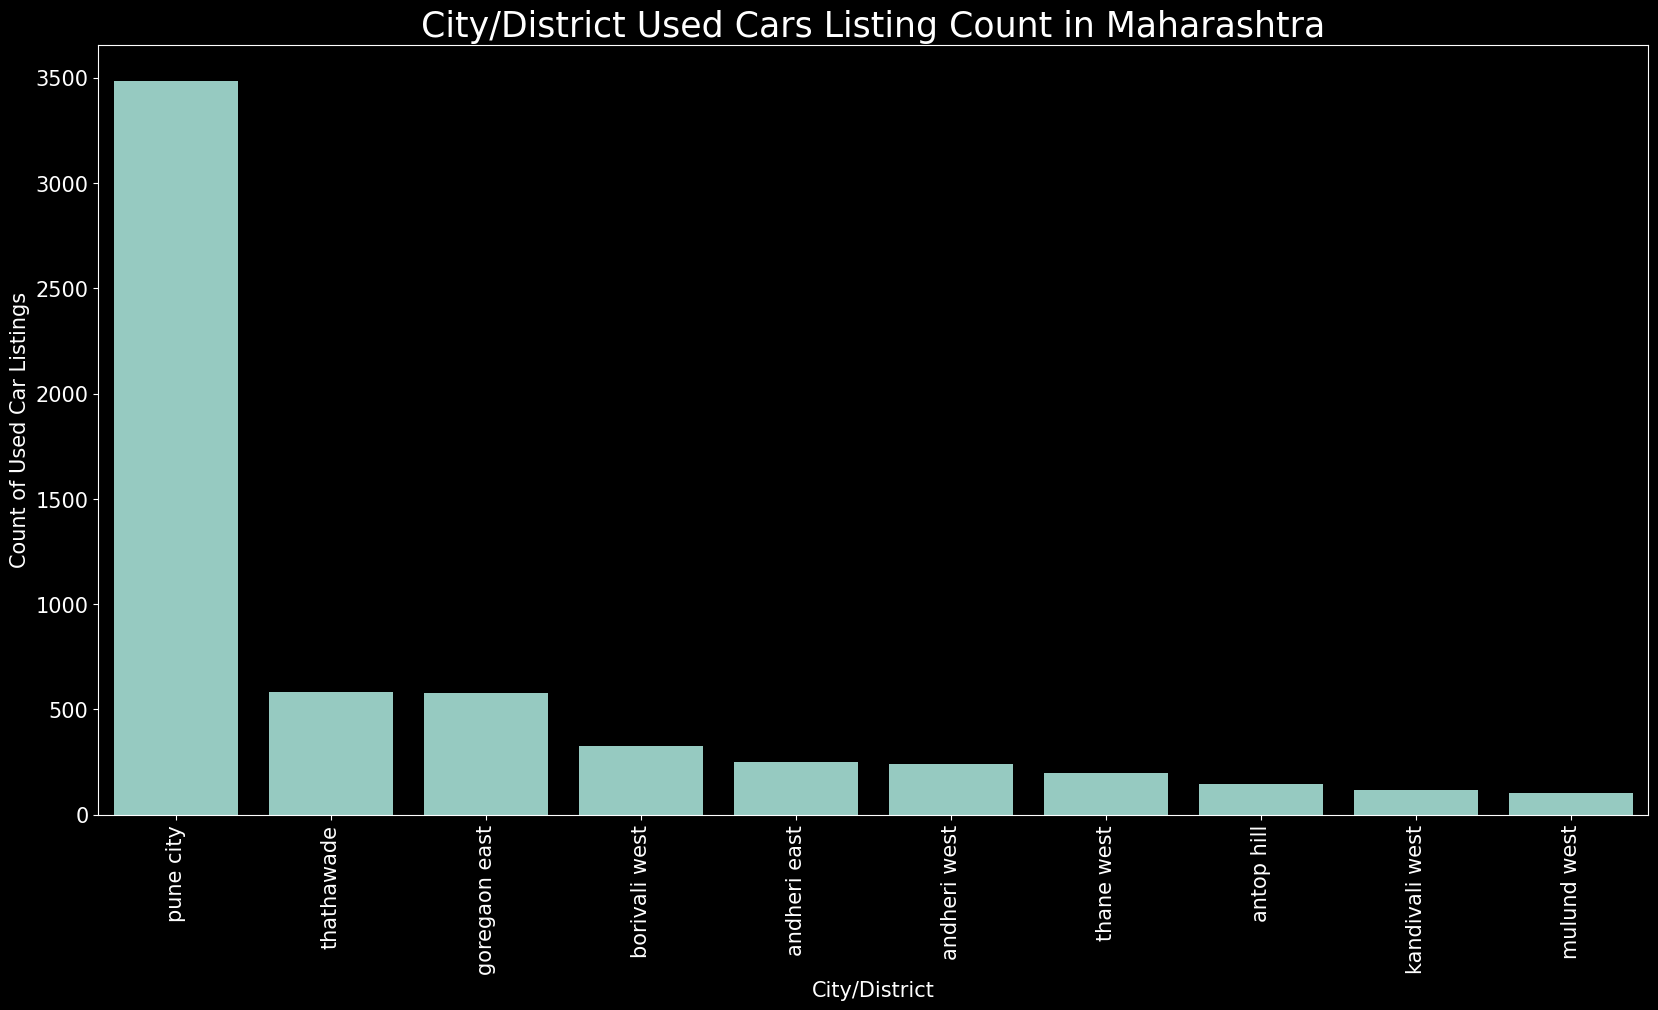

In [140]:
maharashtra_listings=pd.DataFrame(cars_data_clean[cars_data_clean['state']=='maharashtra']['location'].value_counts()).reset_index()
maharashtra_listings['location'] = maharashtra_listings['location'].str.lower()

# Group by the normalized location and sum the counts
maharashtra_listings = maharashtra_listings.groupby('location', as_index=False).sum()
maharashtra_listings=maharashtra_listings.sort_values(by='count',ascending=False)
maharashtra_listings=maharashtra_listings.head(n=10)

plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='location', y='count', data=maharashtra_listings)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('City/District Used Cars Listing Count in Maharashtra', fontsize=25)
plt.xlabel('City/District', fontsize=15) 
plt.ylabel('Count of Used Car Listings', fontsize=15)

plt.savefig('artifacts/plots/Maharashtra_Used_Cars_Listing_Count.jpg', format='jpg')
plt.show()



### Q3 Brand with most listings (top 10)

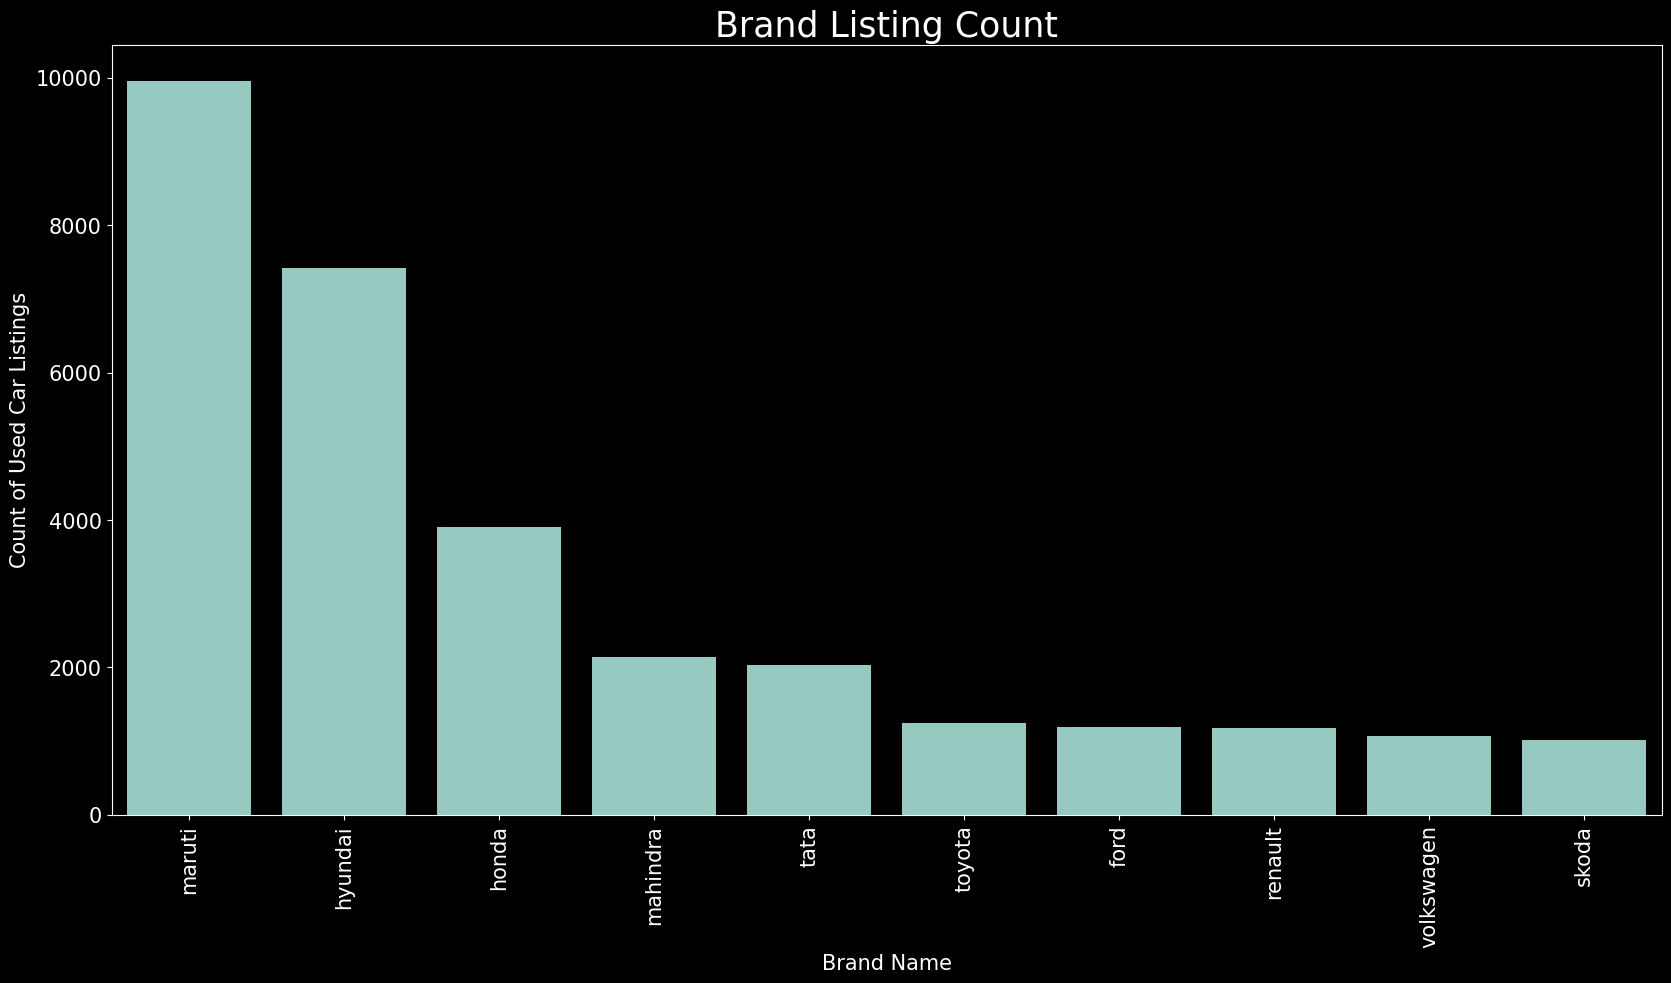

In [141]:


Brand_Listings=pd.DataFrame(cars_data_clean['brand_name'].value_counts()).reset_index()

Brand_Listings = Brand_Listings.groupby('brand_name', as_index=False).sum()
Brand_Listings=Brand_Listings.sort_values(by='count',ascending=False)
Brand_Listings=Brand_Listings.head(n=10)

plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='brand_name', y='count', data=Brand_Listings)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Brand Listing Count', fontsize=25)
plt.xlabel('Brand Name', fontsize=15) 
plt.ylabel('Count of Used Car Listings', fontsize=15)

plt.savefig('artifacts/plots/Brand_Listings_Count.jpg', format='jpg')
plt.show()

#Maruti is most popular

### Q4 Which vehicle of maruti is most popular

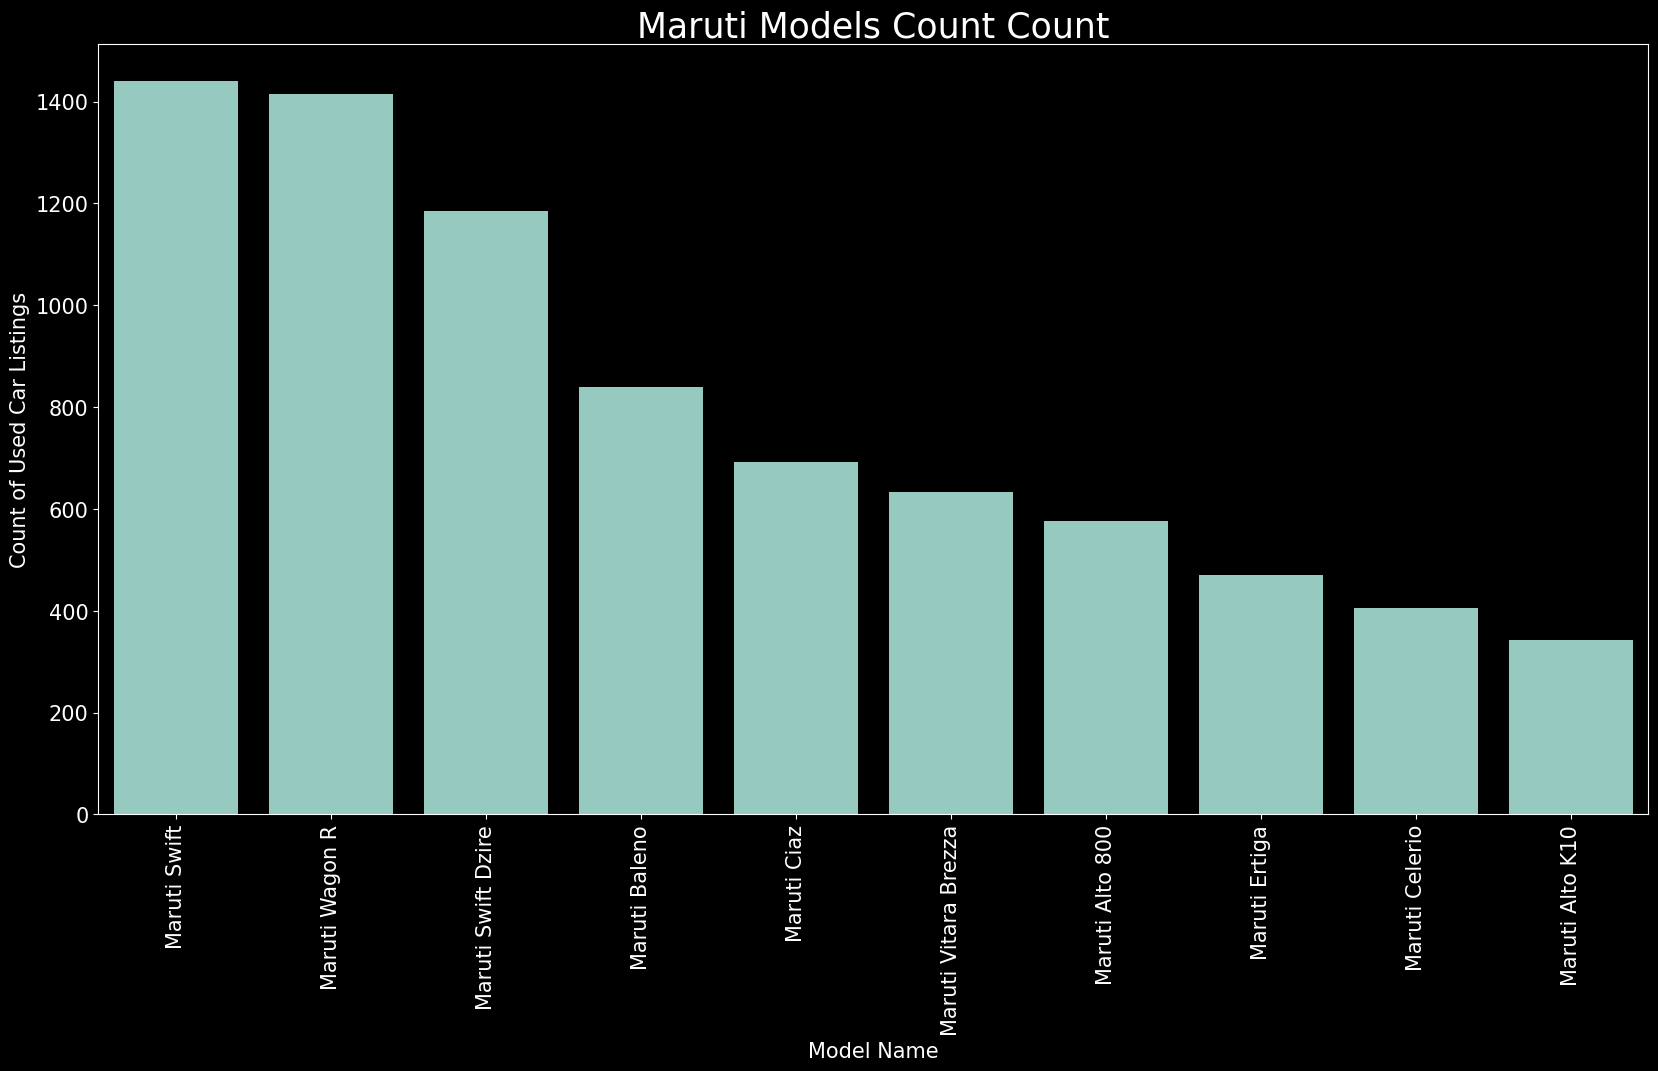

In [142]:



Maruti_Listings=pd.DataFrame(cars_data_clean[cars_data_clean['brand_name']=='maruti']['model'].value_counts()).reset_index()

Maruti_Listings = Maruti_Listings.groupby('model', as_index=False).sum()
Maruti_Listings=Maruti_Listings.sort_values(by='count',ascending=False)
Maruti_Listings=Maruti_Listings.head(n=10)

plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='model', y='count', data=Maruti_Listings)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Maruti Models Count Count', fontsize=25)
plt.xlabel('Model Name', fontsize=15) 
plt.ylabel('Count of Used Car Listings', fontsize=15)

plt.savefig('artifacts/plots/Maruti_Models_Listings_Count.jpg', format='jpg')
plt.show()

#Swift is Most Common

### Q5 For top 5 States with most listings, breakdown of which brand is most popular

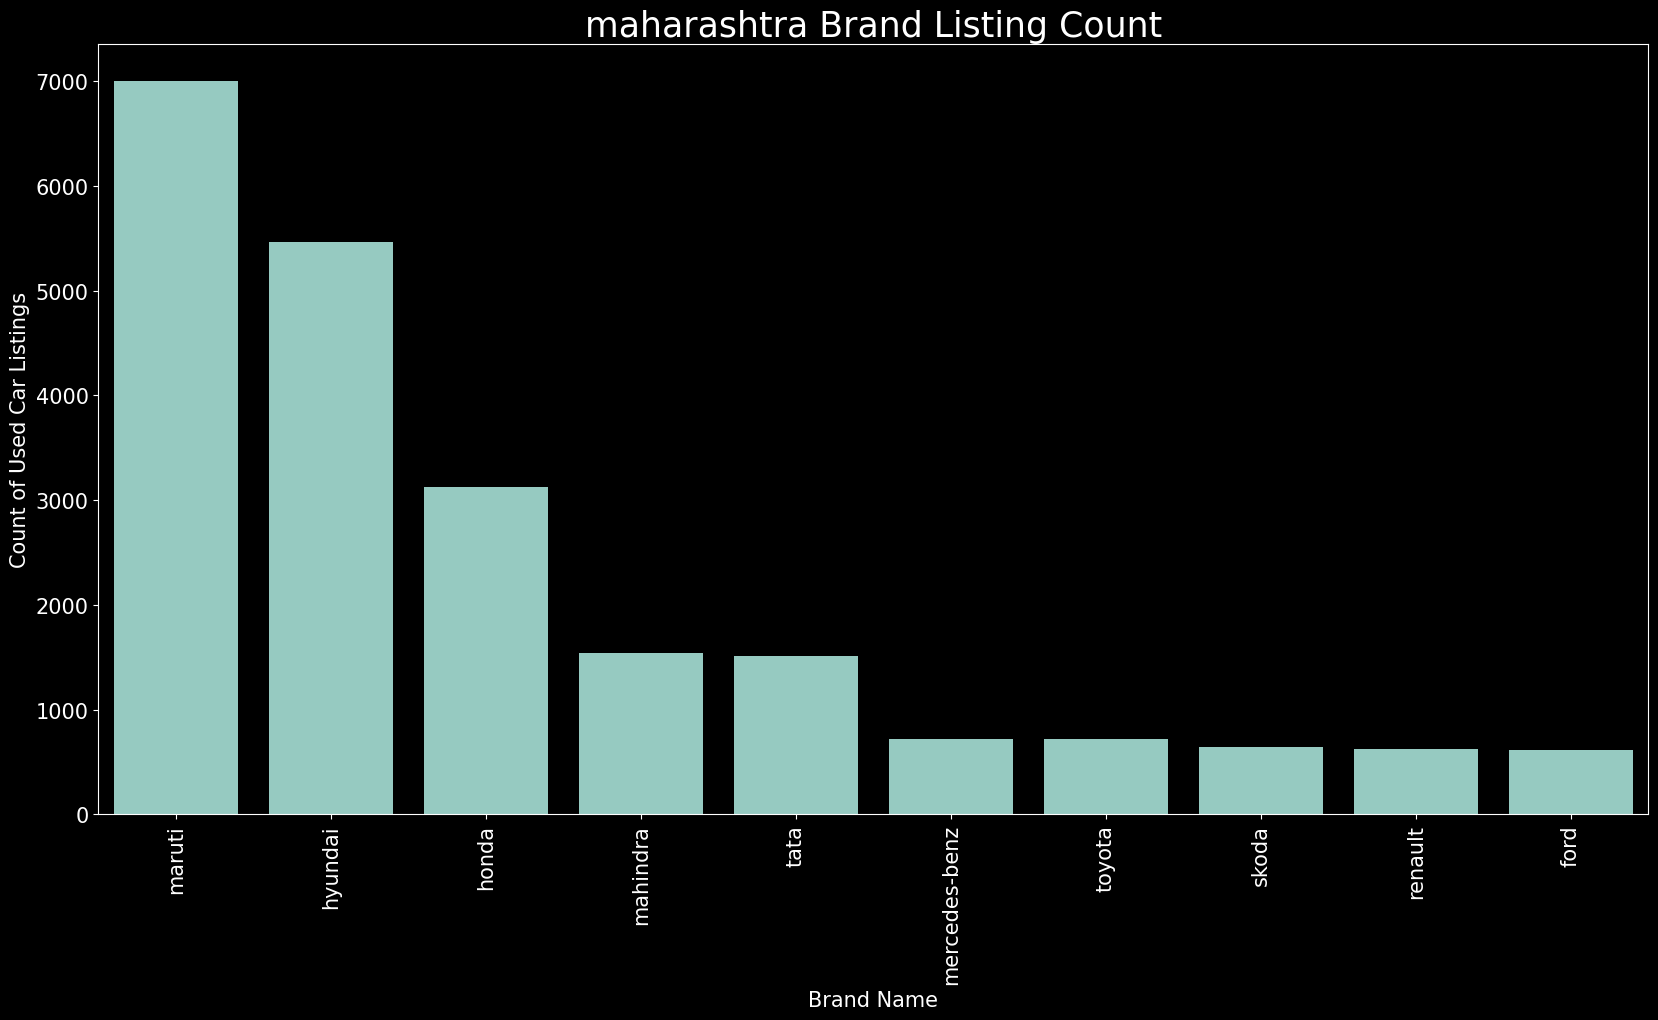

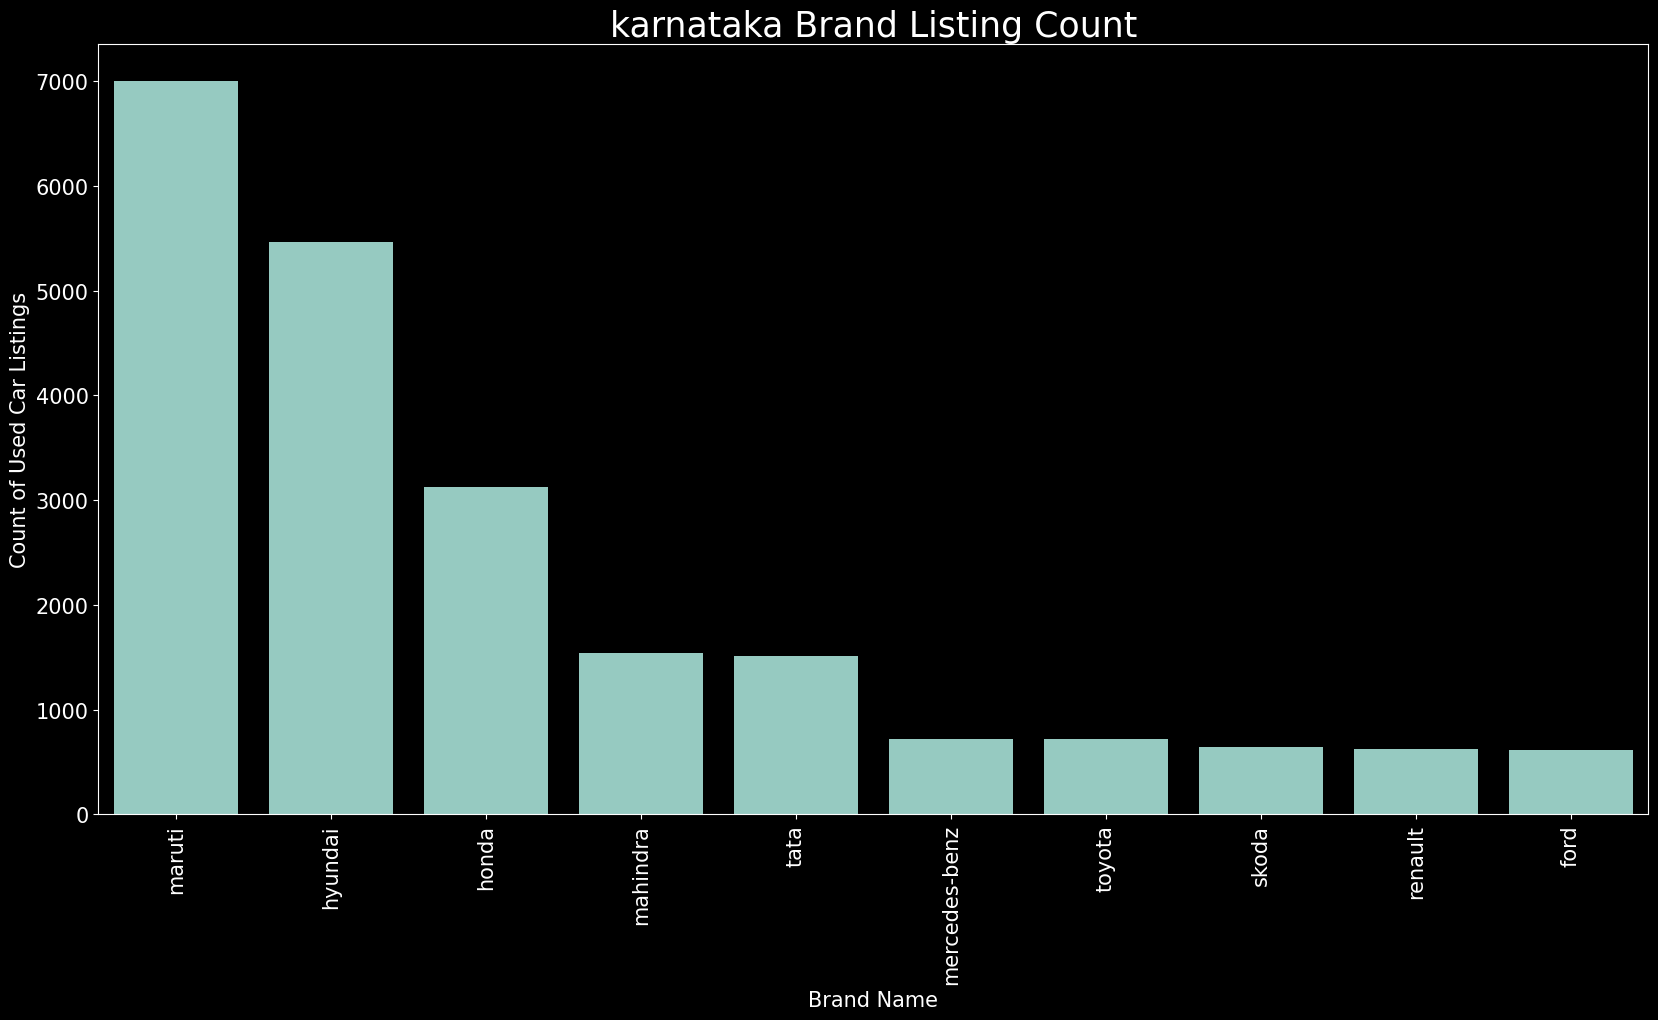

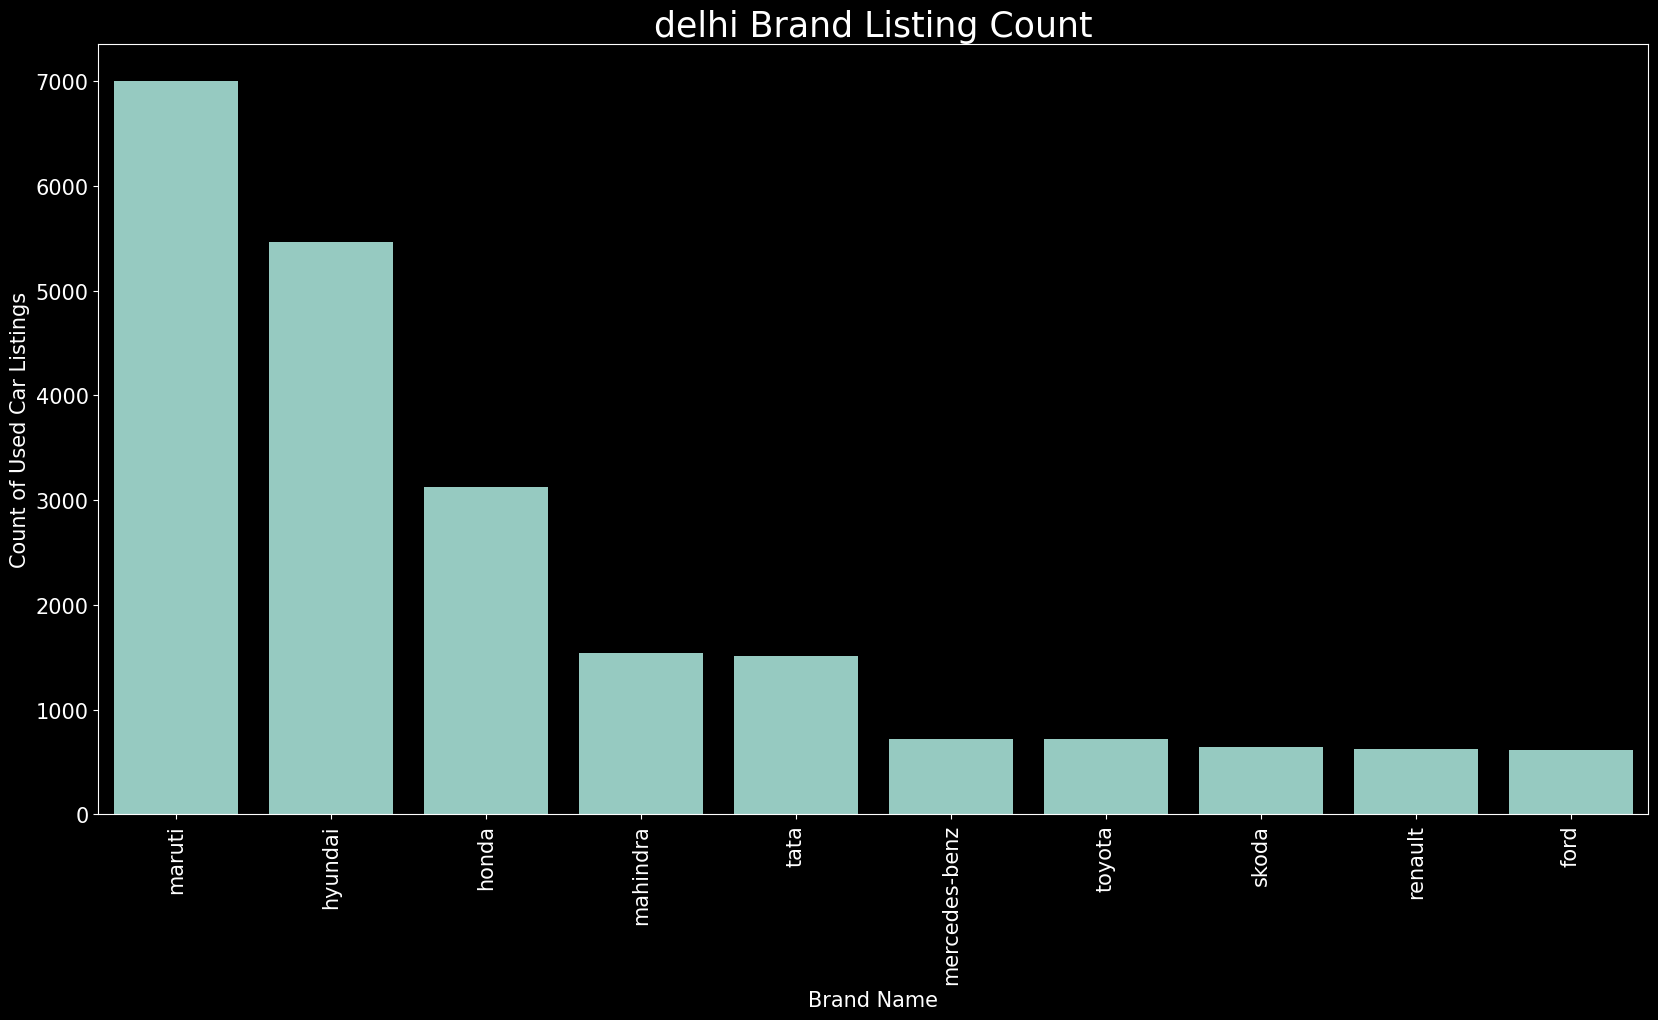

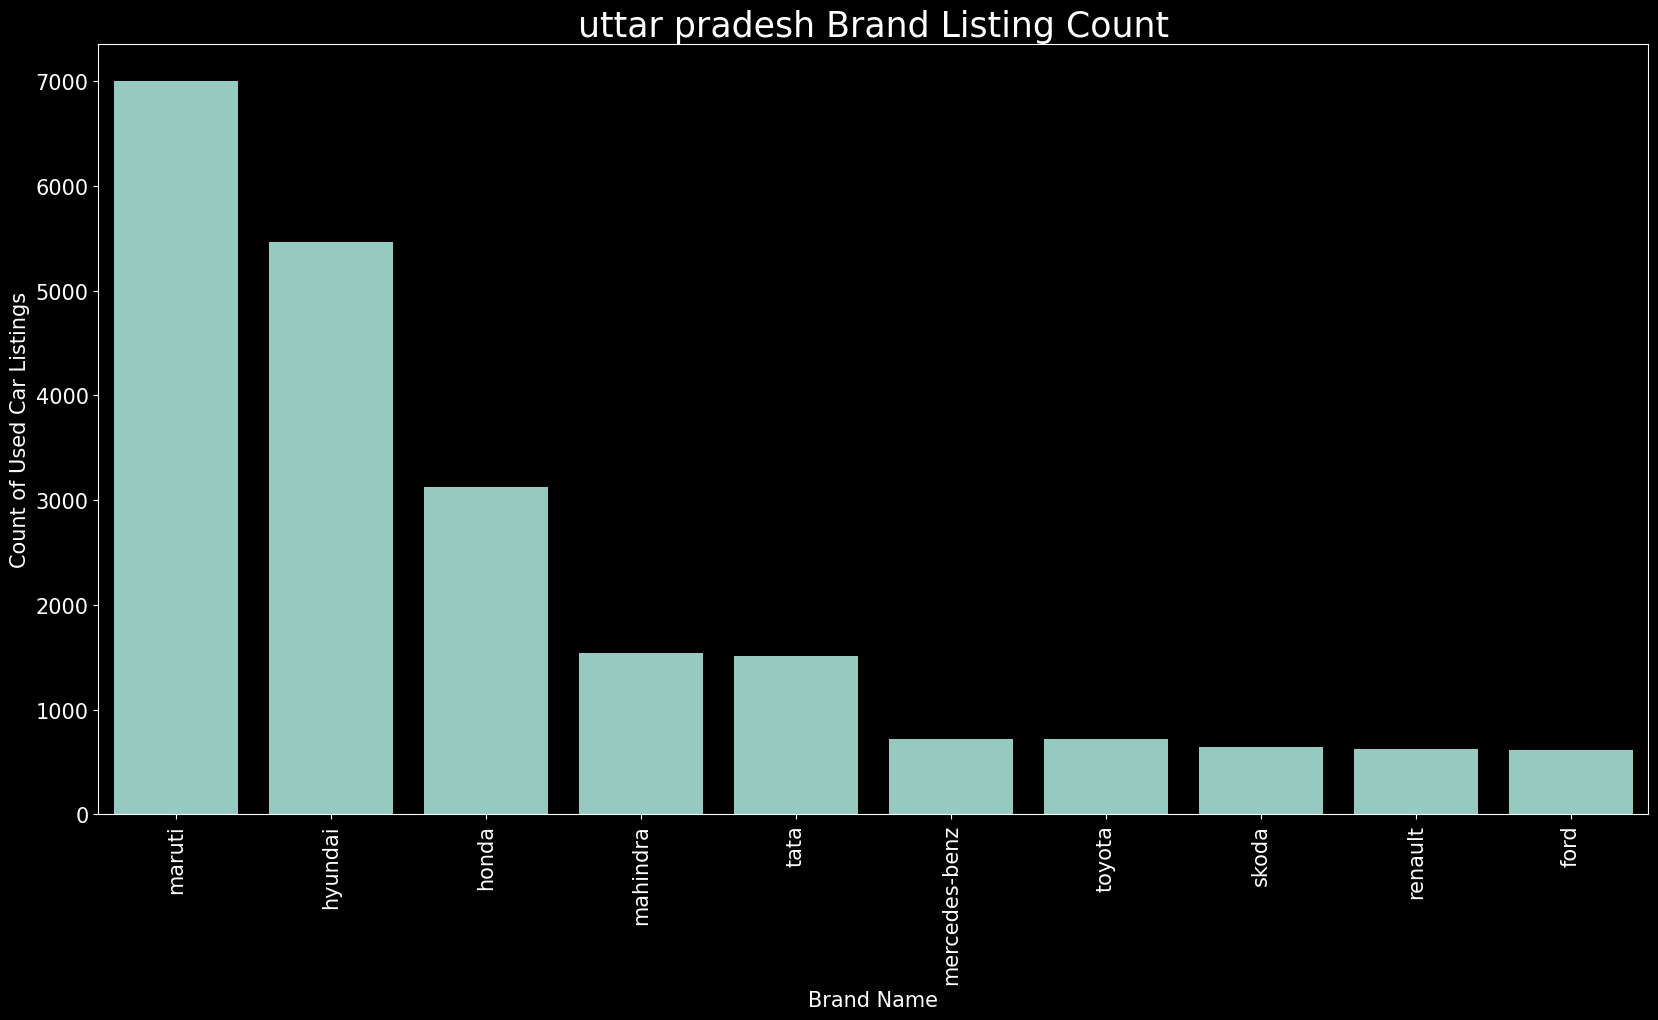

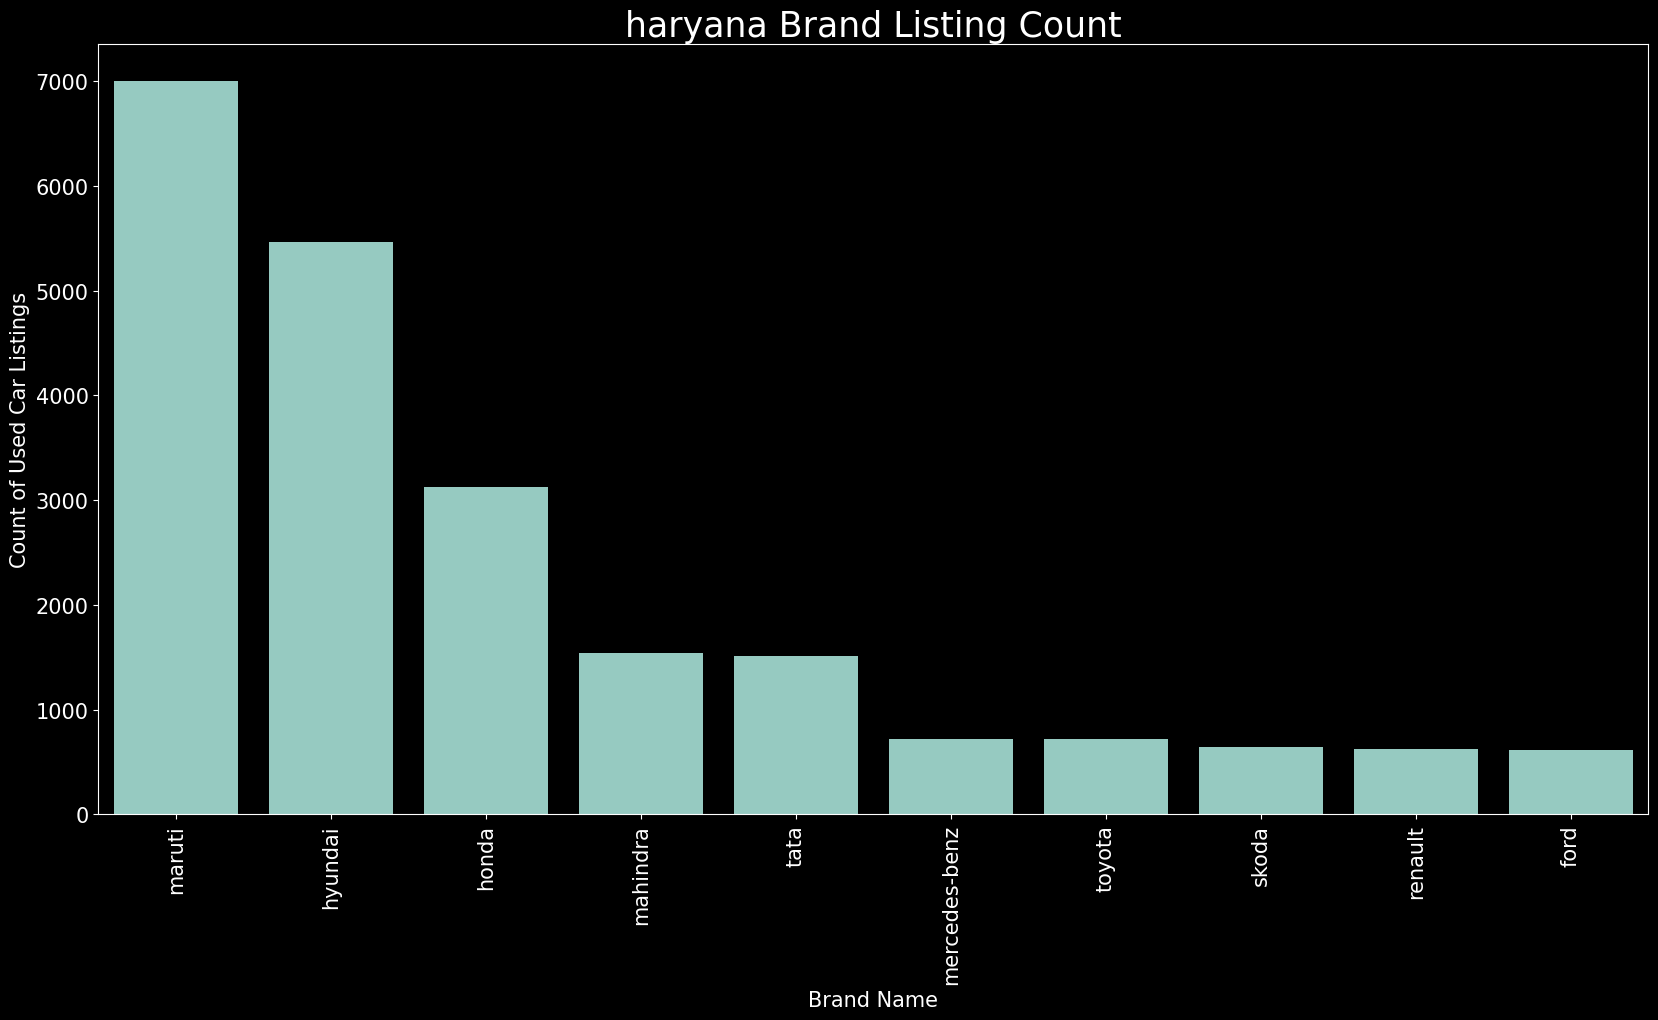

In [143]:
top_5_states_data=cars_data_clean[cars_data_clean['state'].isin(list(state_ut_count['state'].head(n=5).values))]
top_5_states_name=list(state_ut_count['state'].head(n=5).values)
top_5_states_name


for state in top_5_states_name:
    top_5_states_data[top_5_states_data['state']==state]
    Brand_Listings=pd.DataFrame(top_5_states_data['brand_name'].value_counts()).reset_index()

    Brand_Listings = Brand_Listings.groupby('brand_name', as_index=False).sum()
    Brand_Listings=Brand_Listings.sort_values(by='count',ascending=False)
    Brand_Listings=Brand_Listings.head(n=10)

    plt.style.use('dark_background')
    plt.figure(figsize=(20, 10))
    sns.barplot(x='brand_name', y='count', data=Brand_Listings)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{state} Brand Listing Count', fontsize=25)
    plt.xlabel('Brand Name', fontsize=15) 
    plt.ylabel('Count of Used Car Listings', fontsize=15)

    plt.savefig(f'artifacts/plots/{state}_Brand_Listings_Count.jpg', format='jpg')
    plt.show()
    

### Q6 For top 5 States with most listings, breakdown of which type of vehicle (hatchback, sedan, etc) is most popular

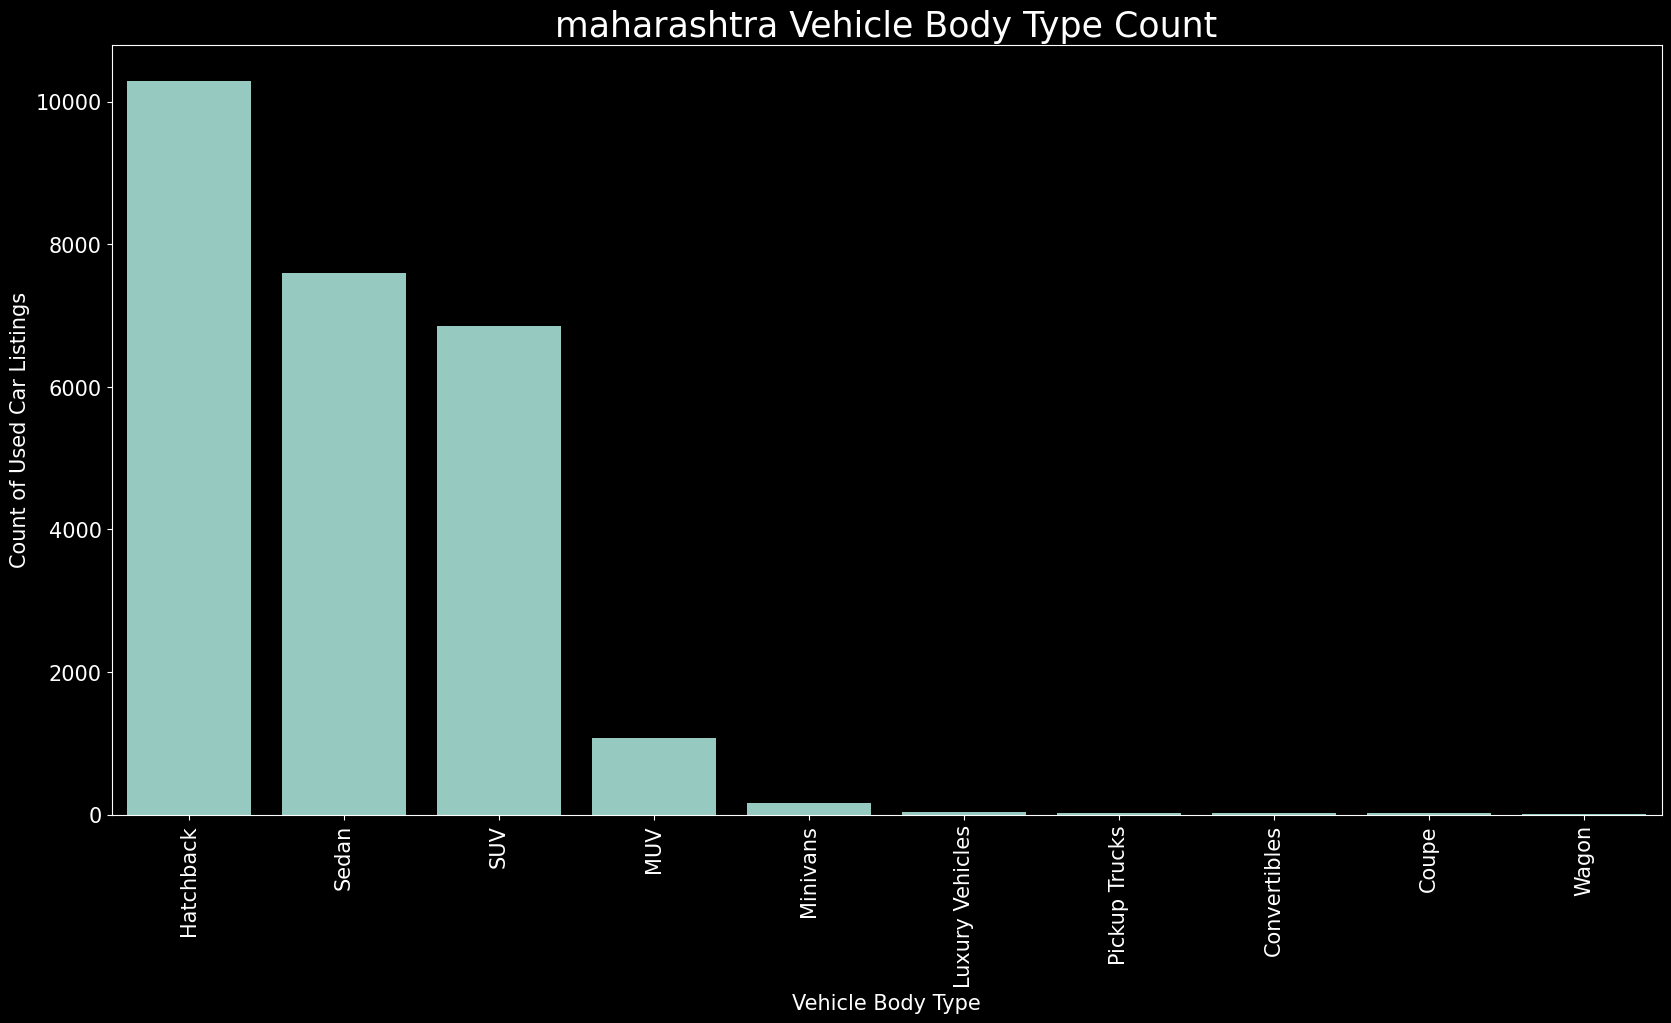

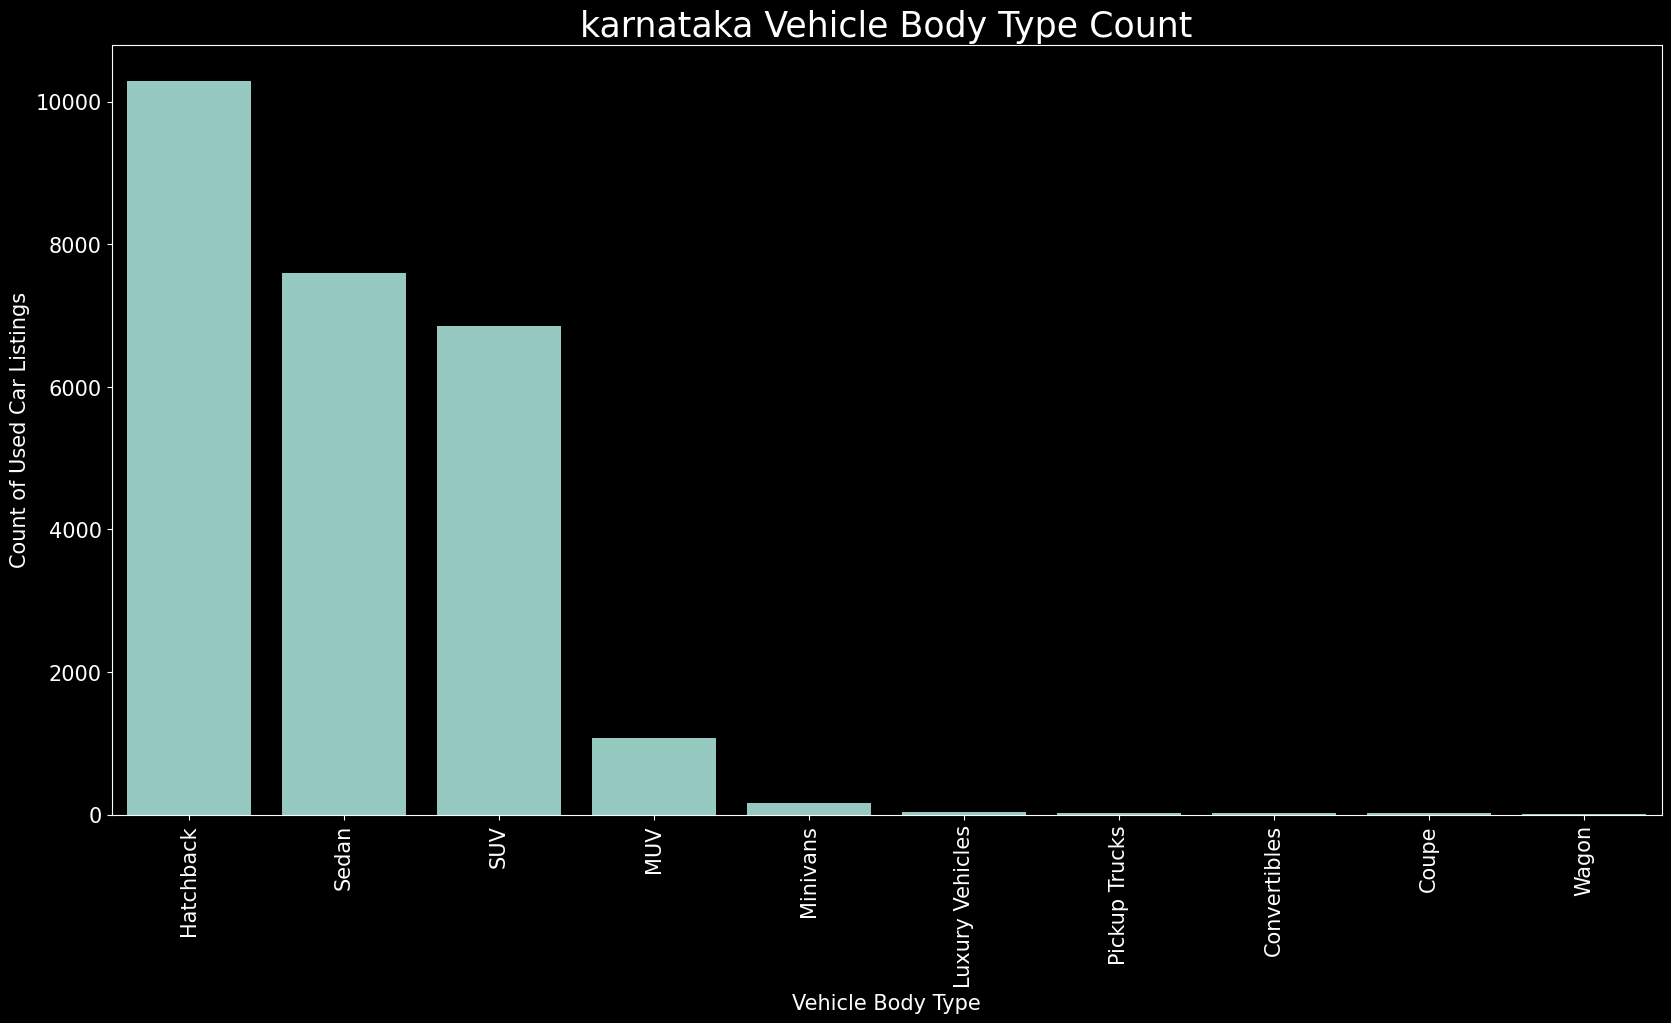

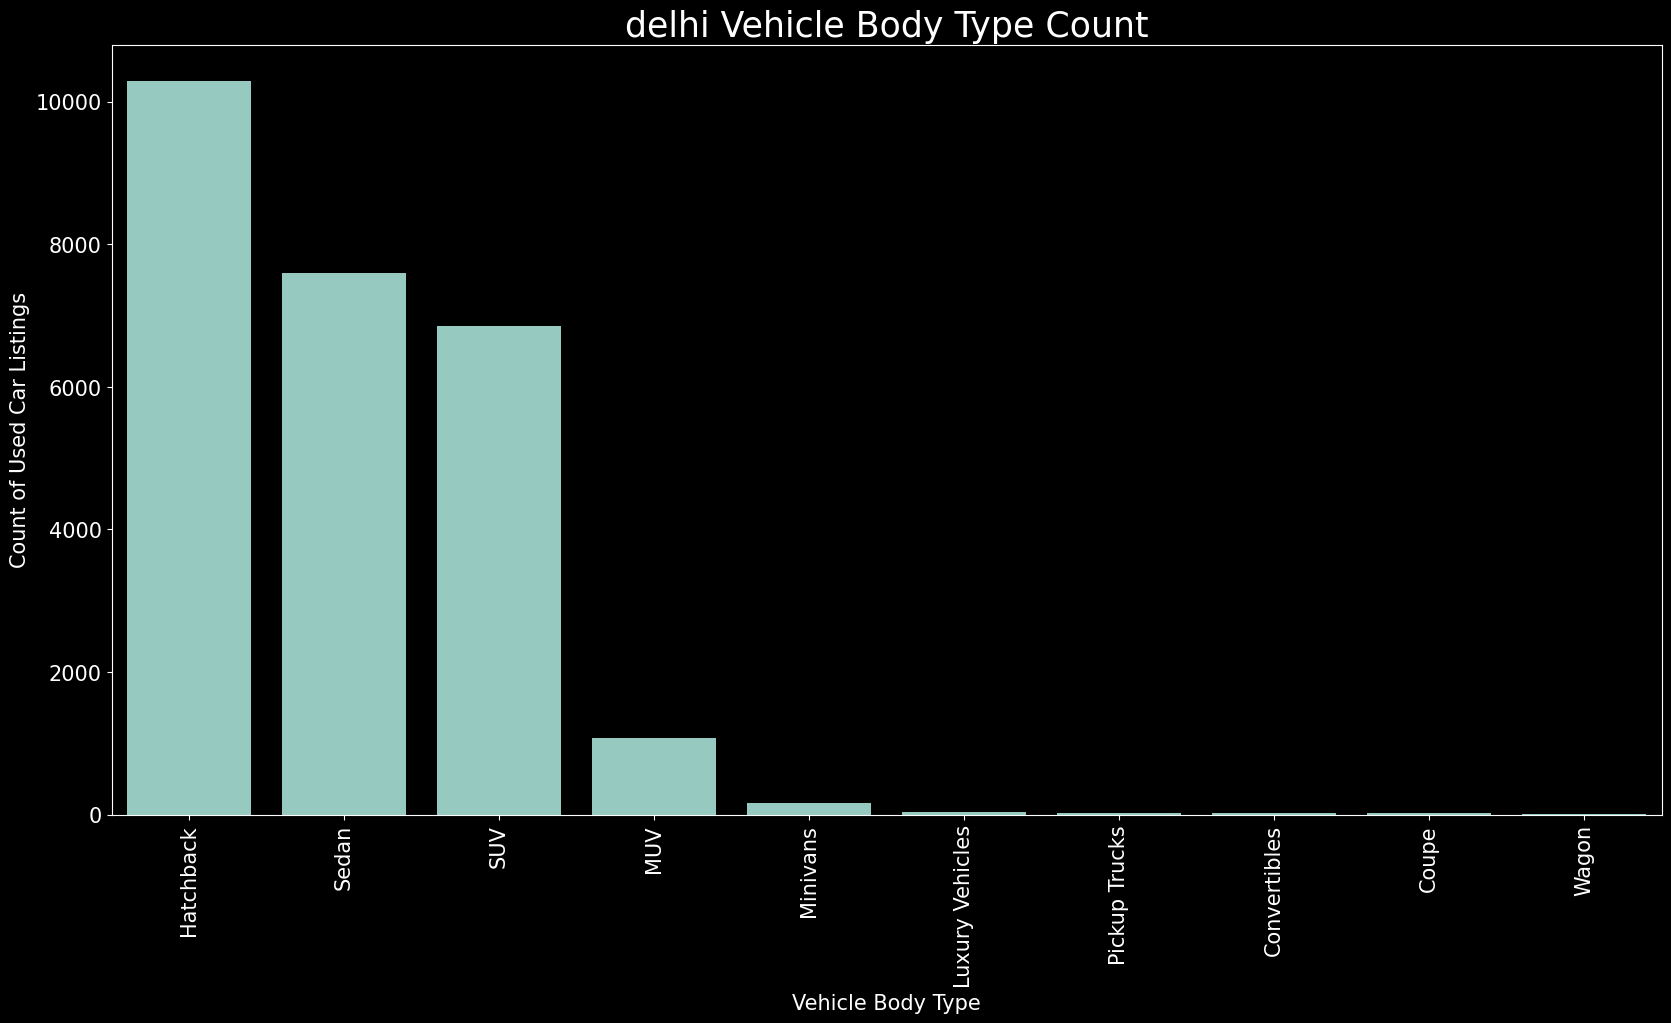

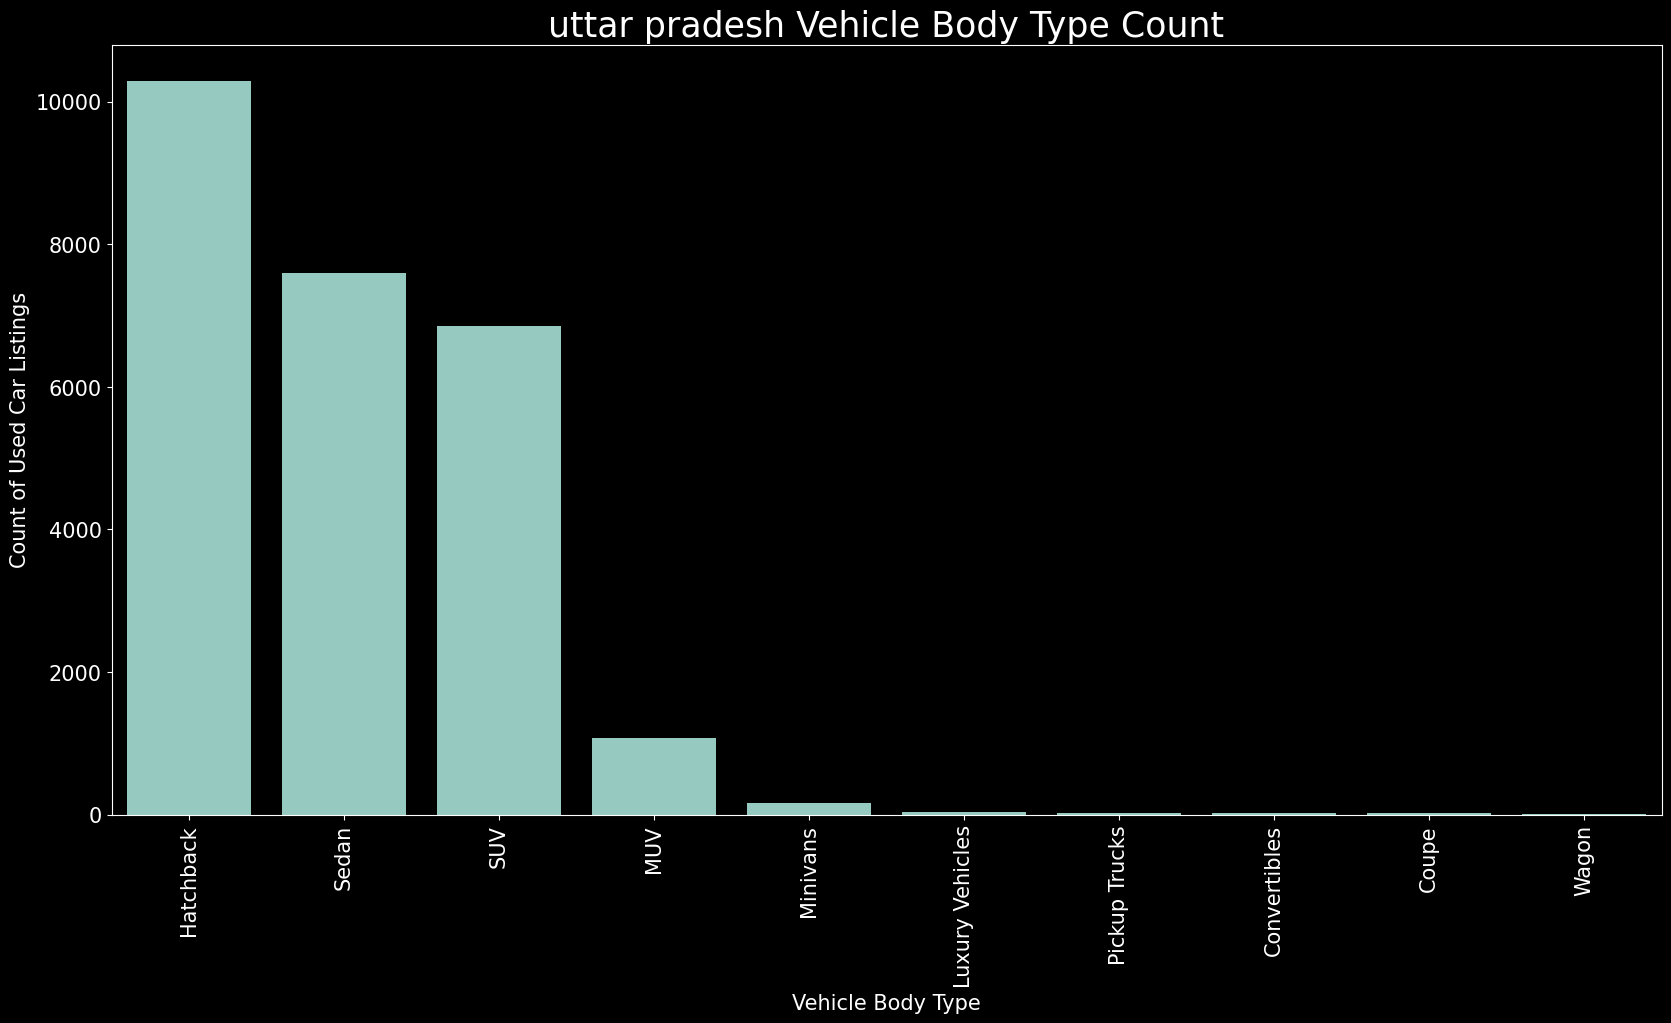

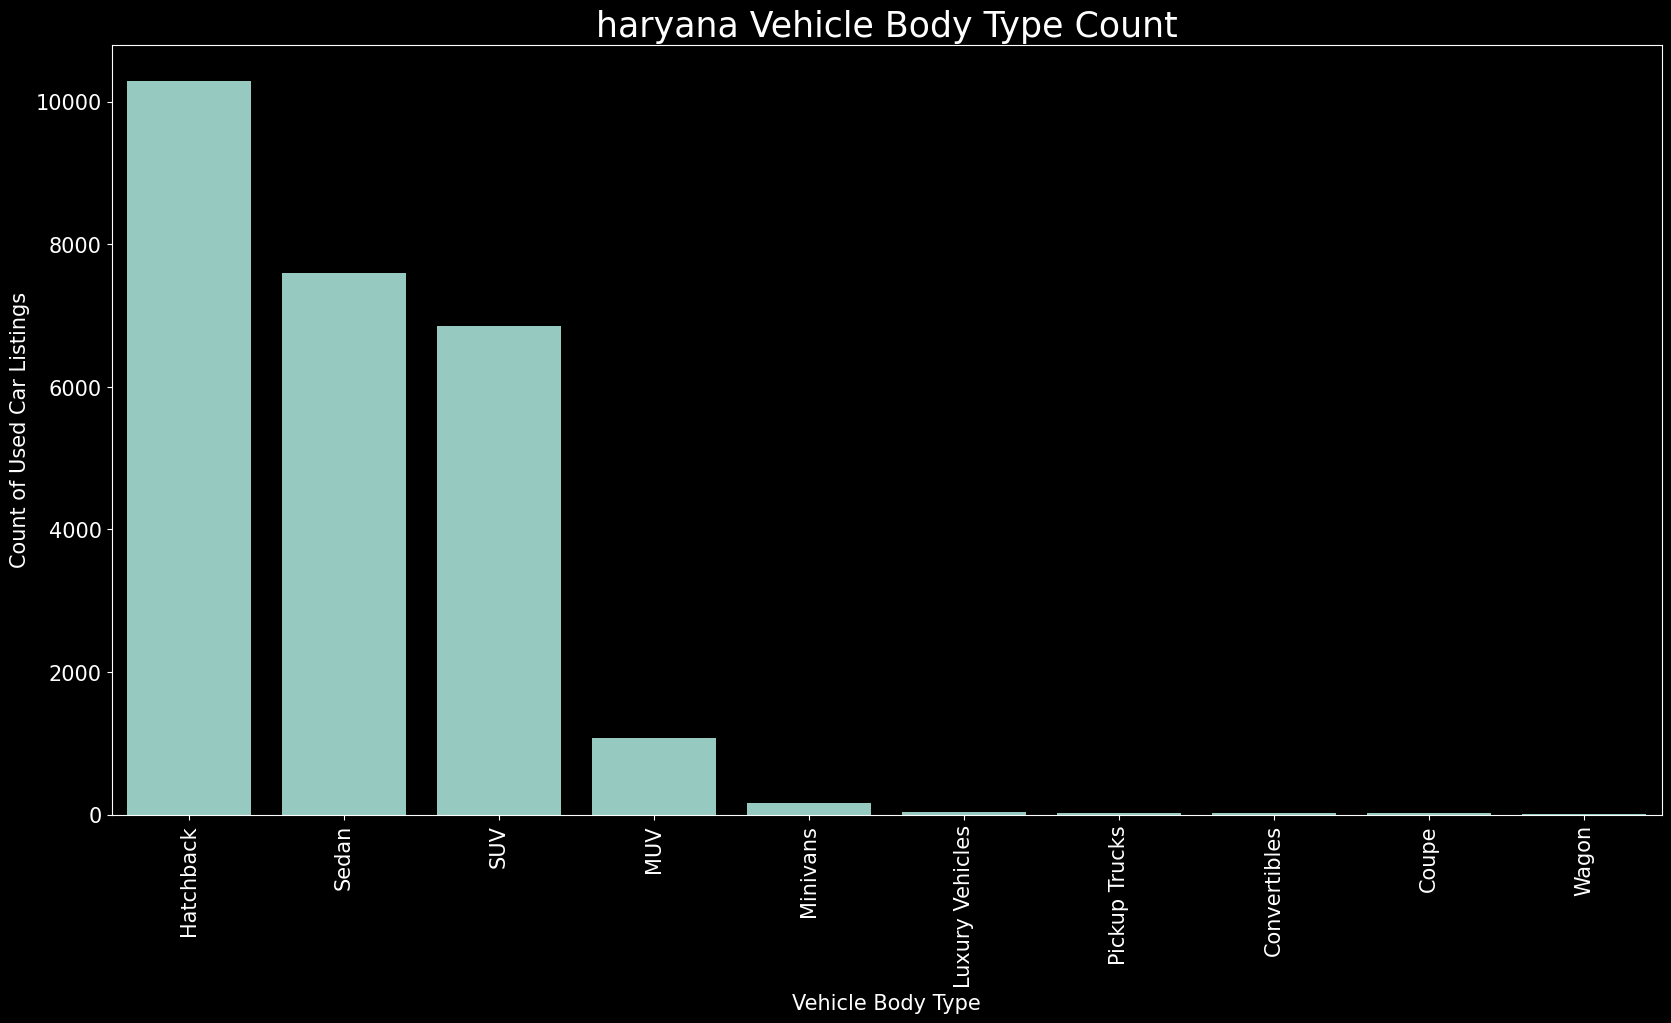

In [144]:
top_5_states_data=cars_data_clean[cars_data_clean['state'].isin(list(state_ut_count['state'].head(n=5).values))]
top_5_states_name=list(state_ut_count['state'].head(n=5).values)
top_5_states_name


for state in top_5_states_name:
    top_5_states_data[top_5_states_data['state']==state]
    Body_Type_Listings=pd.DataFrame(top_5_states_data['Body_Type'].value_counts()).reset_index()

    Body_Type_Listings = Body_Type_Listings.groupby('Body_Type', as_index=False).sum()
    Body_Type_Listings=Body_Type_Listings.sort_values(by='count',ascending=False)
    Body_Type_Listings=Body_Type_Listings.head(n=10)

    plt.style.use('dark_background')
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Body_Type', y='count', data=Body_Type_Listings)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{state} Vehicle Body Type Count', fontsize=25)
    plt.xlabel('Vehicle Body Type', fontsize=15) 
    plt.ylabel('Count of Used Car Listings', fontsize=15)

    plt.savefig(f'artifacts/plots/{state}_Vehicle_Body_Type_Count.jpg', format='jpg')
    plt.show()
    

### Q7 For top 5 States with most listings, breakdown of what fuel type is most prefrerred

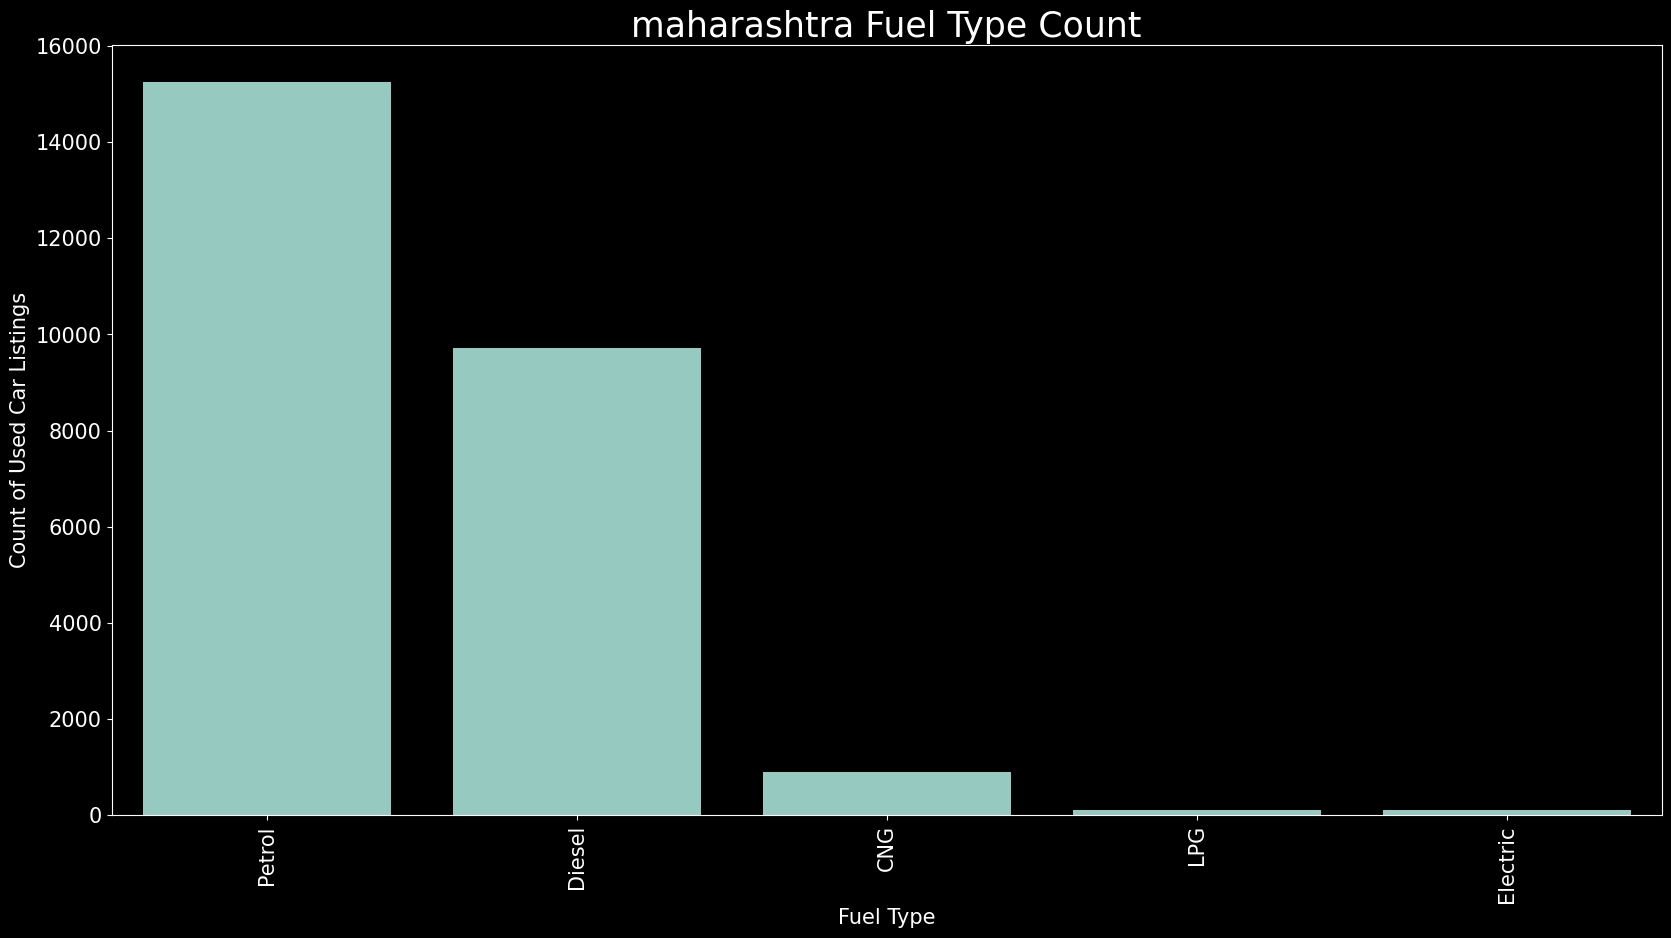

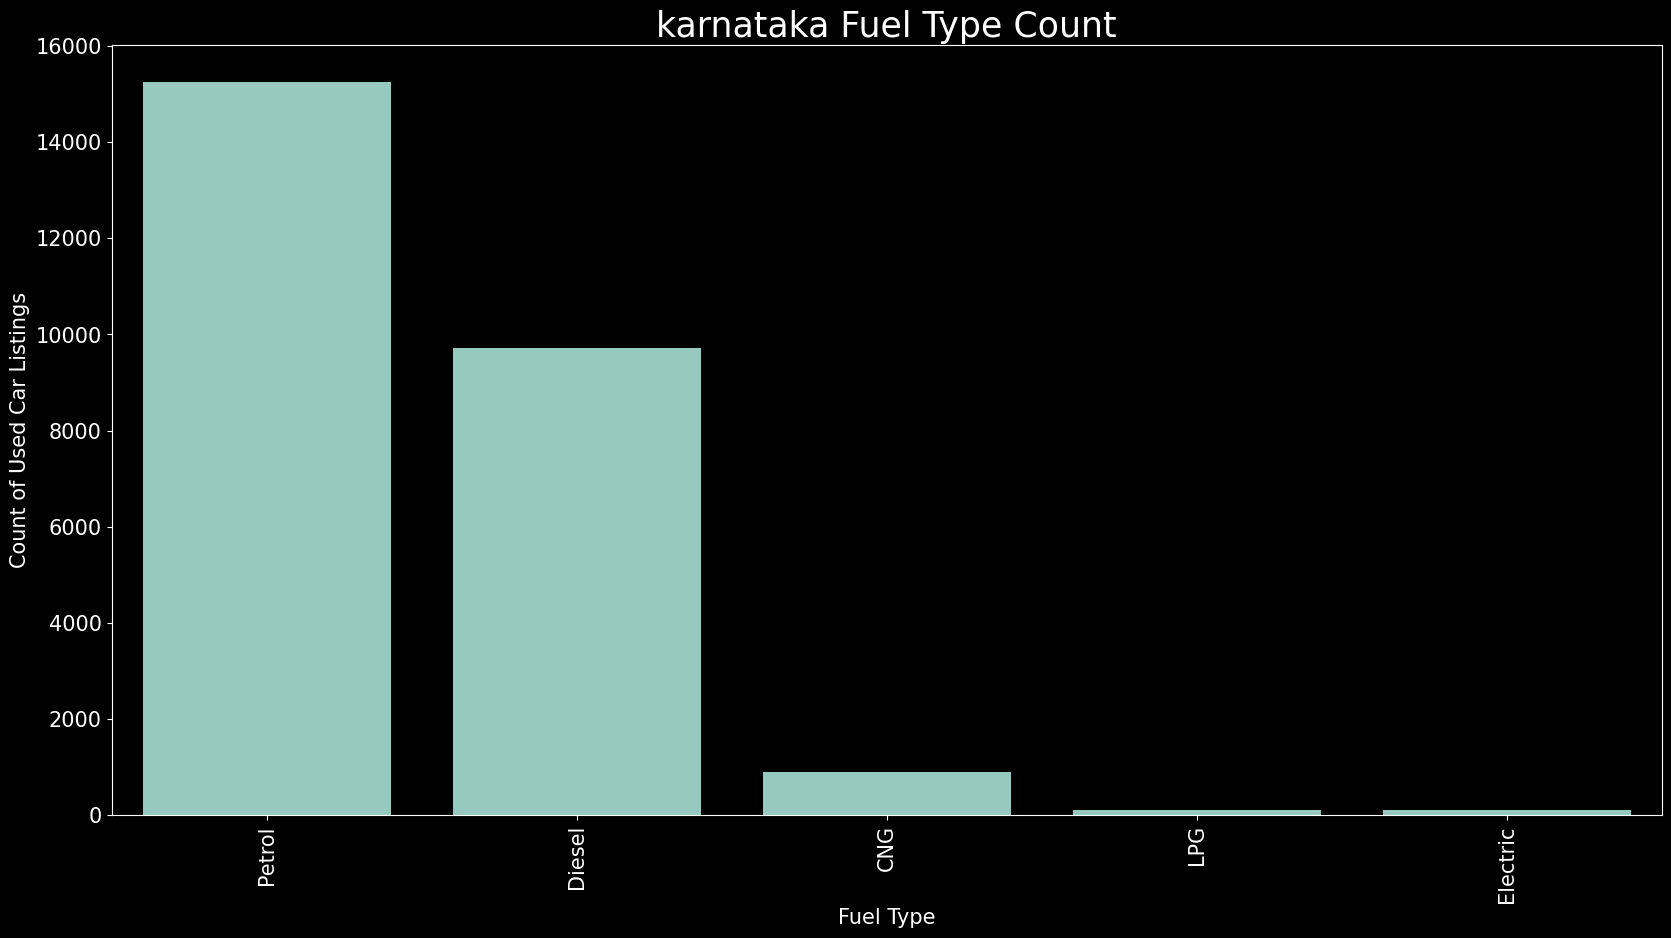

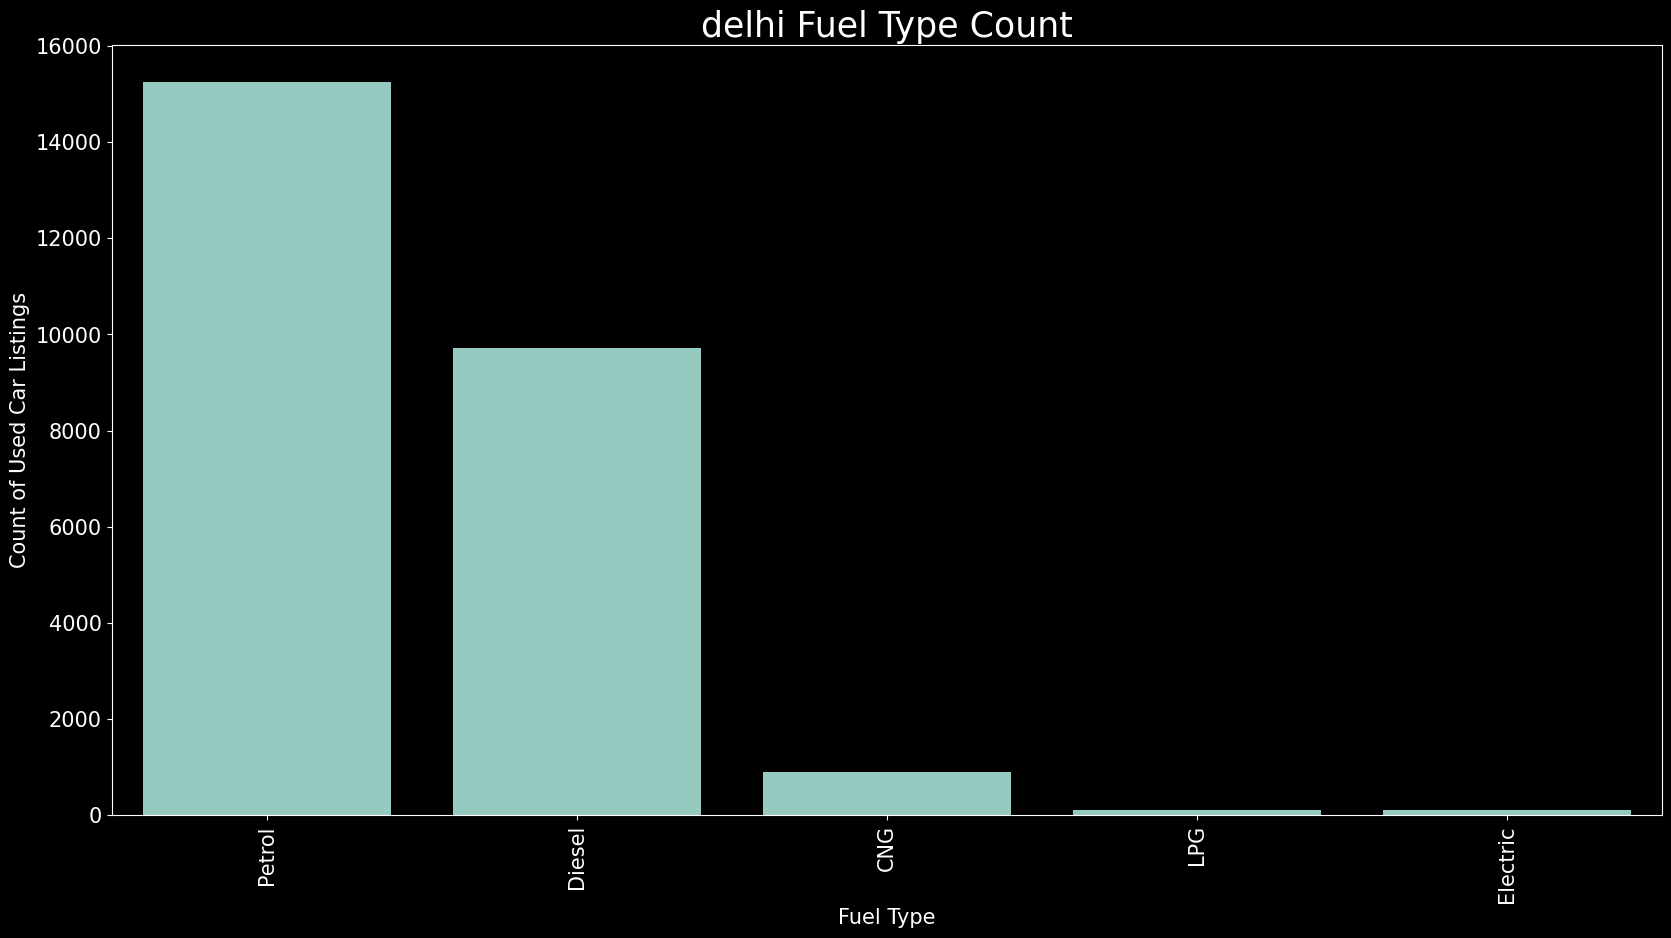

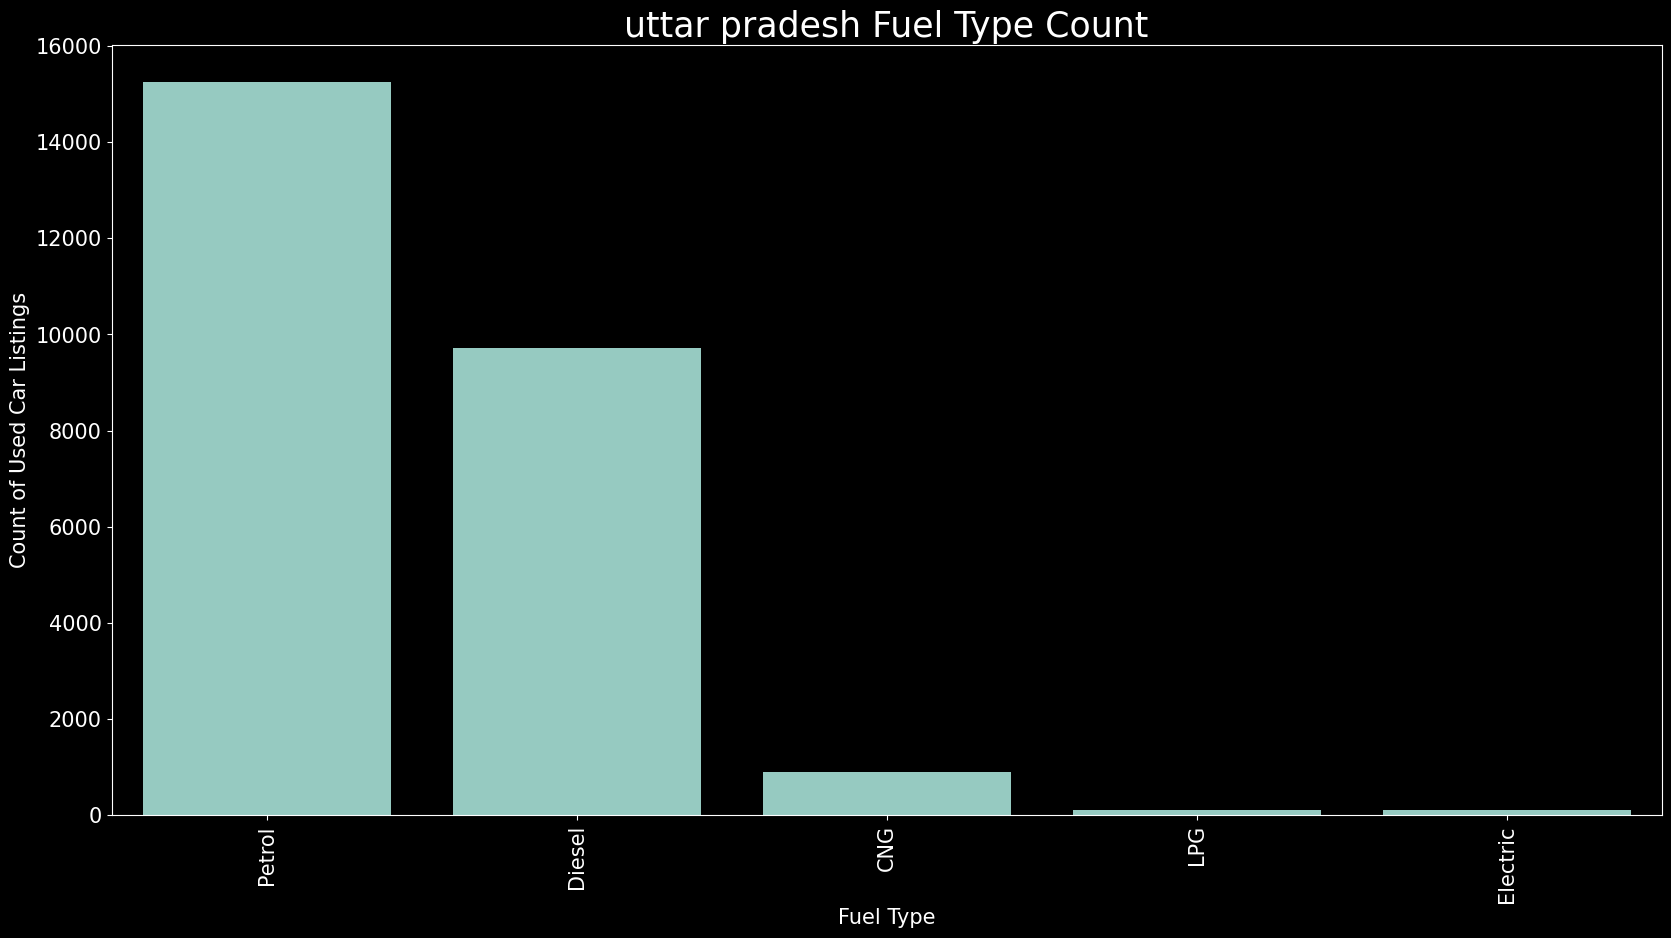

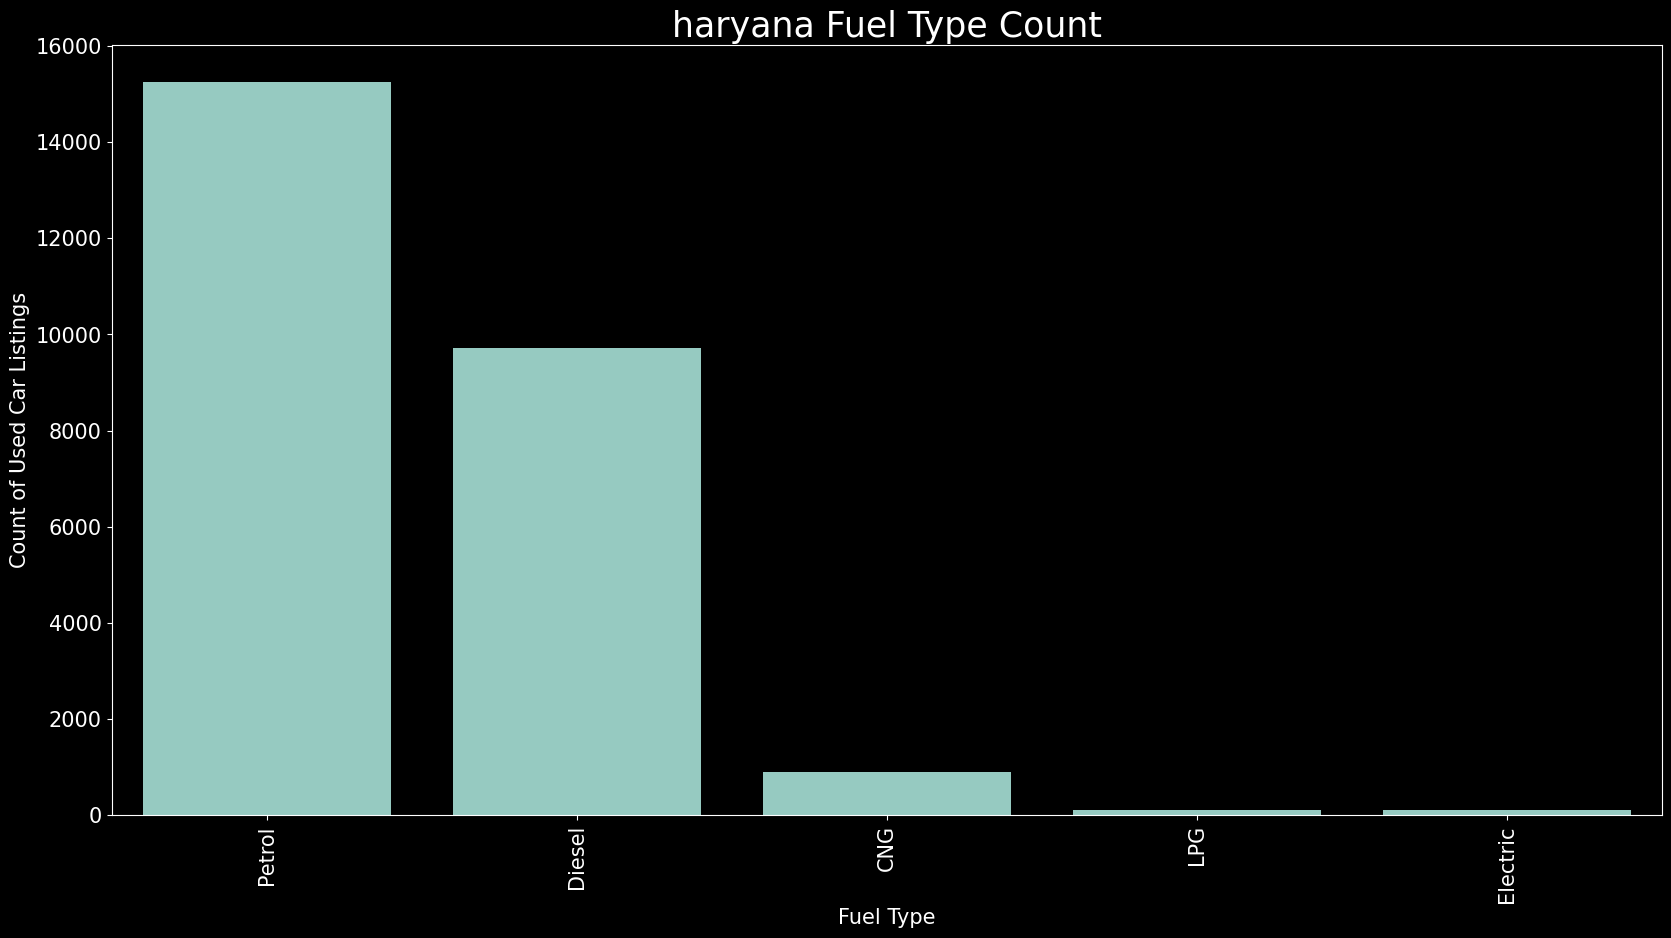

In [145]:
top_5_states_data=cars_data_clean[cars_data_clean['state'].isin(list(state_ut_count['state'].head(n=5).values))]
top_5_states_name=list(state_ut_count['state'].head(n=5).values)
top_5_states_name


for state in top_5_states_name:
    top_5_states_data[top_5_states_data['state']==state]
    Fuel_Type_Listings=pd.DataFrame(top_5_states_data['Fuel_Type'].value_counts()).reset_index()

    Fuel_Type_Listings = Fuel_Type_Listings.groupby('Fuel_Type', as_index=False).sum()
    Fuel_Type_Listings=Fuel_Type_Listings.sort_values(by='count',ascending=False)
    Fuel_Type_Listings=Fuel_Type_Listings.head(n=10)

    plt.style.use('dark_background')
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Fuel_Type', y='count', data=Fuel_Type_Listings)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{state} Fuel Type Count', fontsize=25)
    plt.xlabel('Fuel Type', fontsize=15) 
    plt.ylabel('Count of Used Car Listings', fontsize=15)

    plt.savefig(f'artifacts/plots/{state}_Fuel_Type_Count.jpg', format='jpg')
    plt.show()
    

### Q8 For top 5 States with most listings, breakdown of what Transmission type is most prefrerred

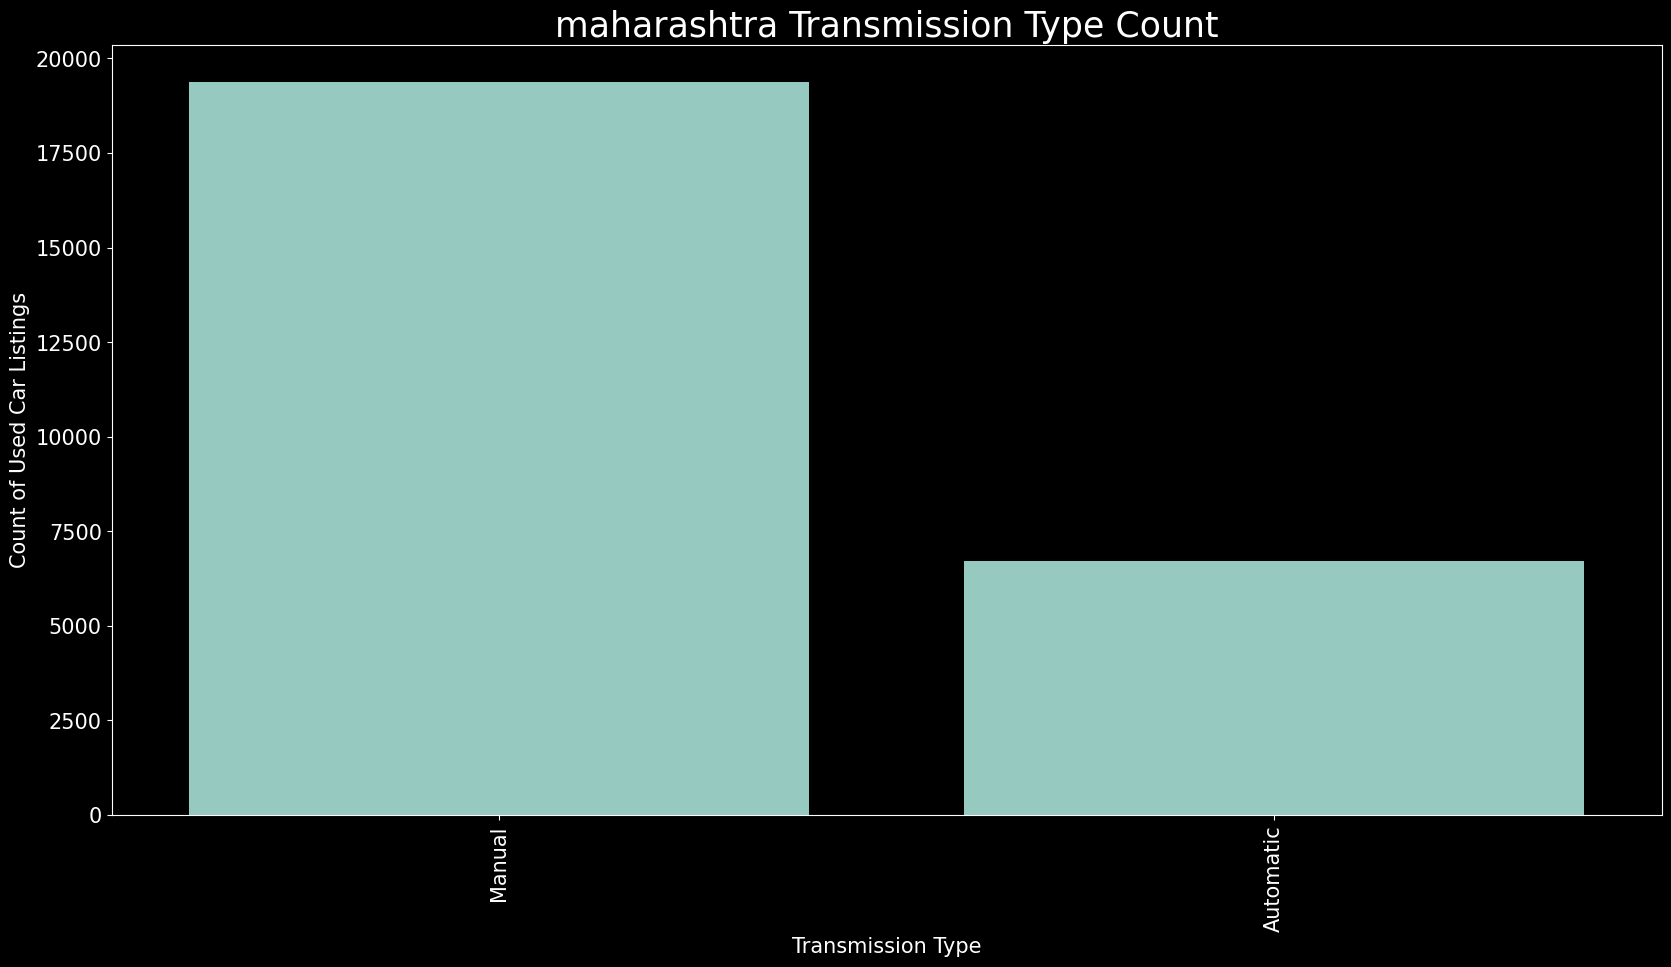

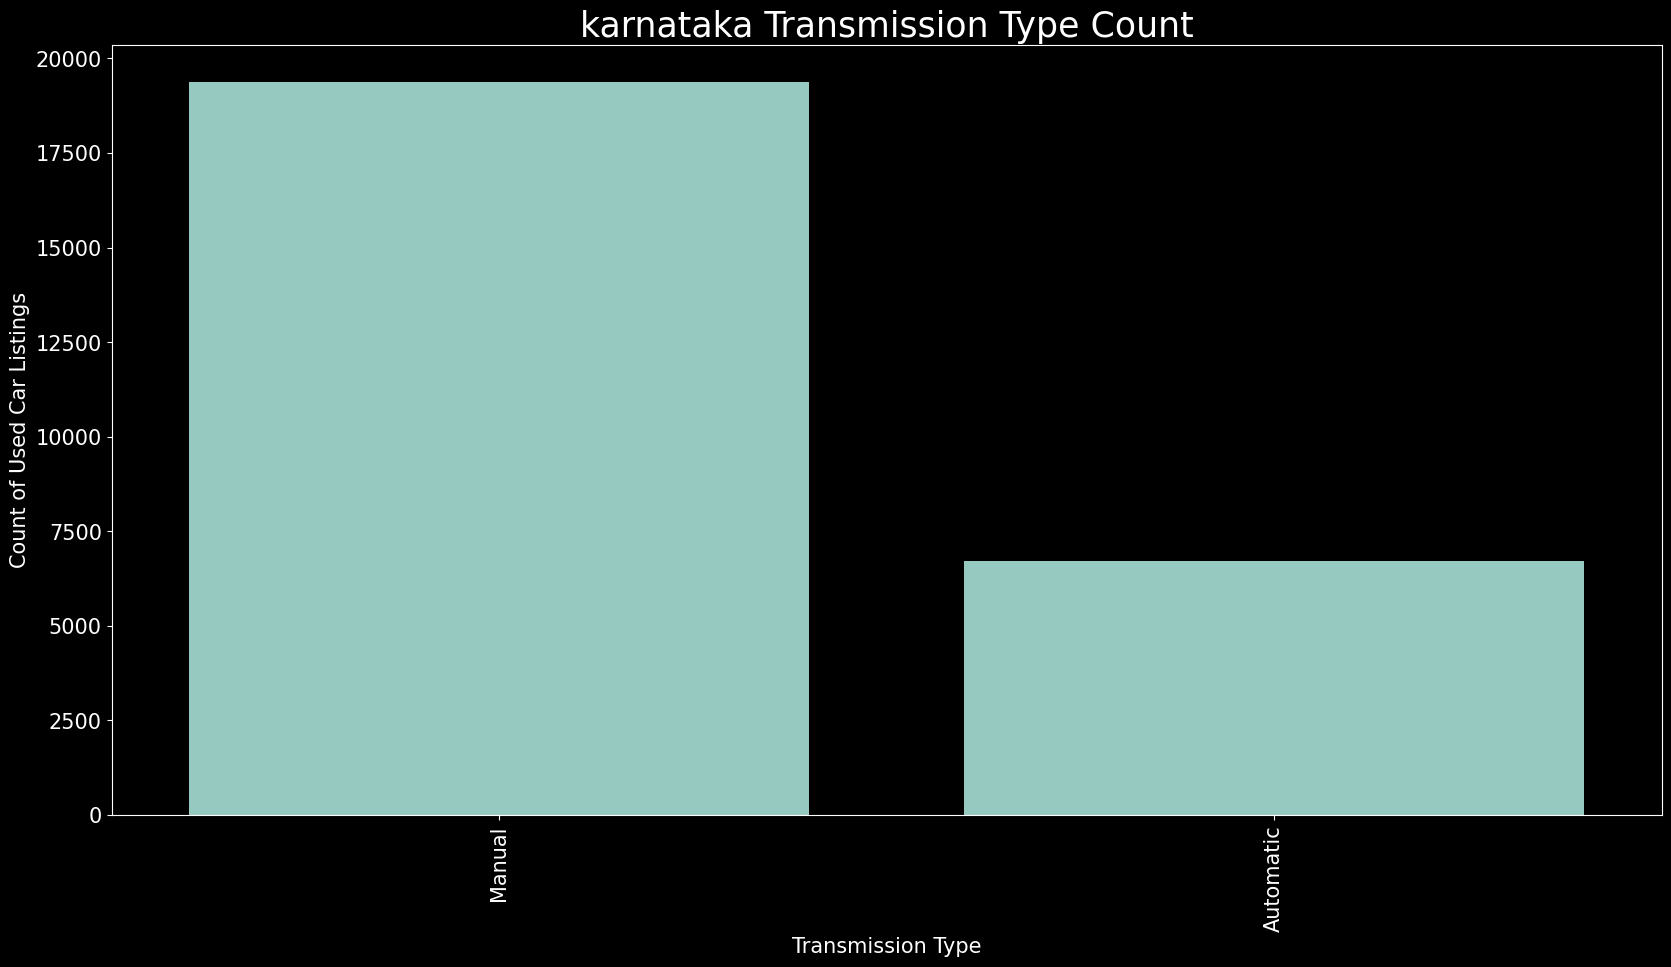

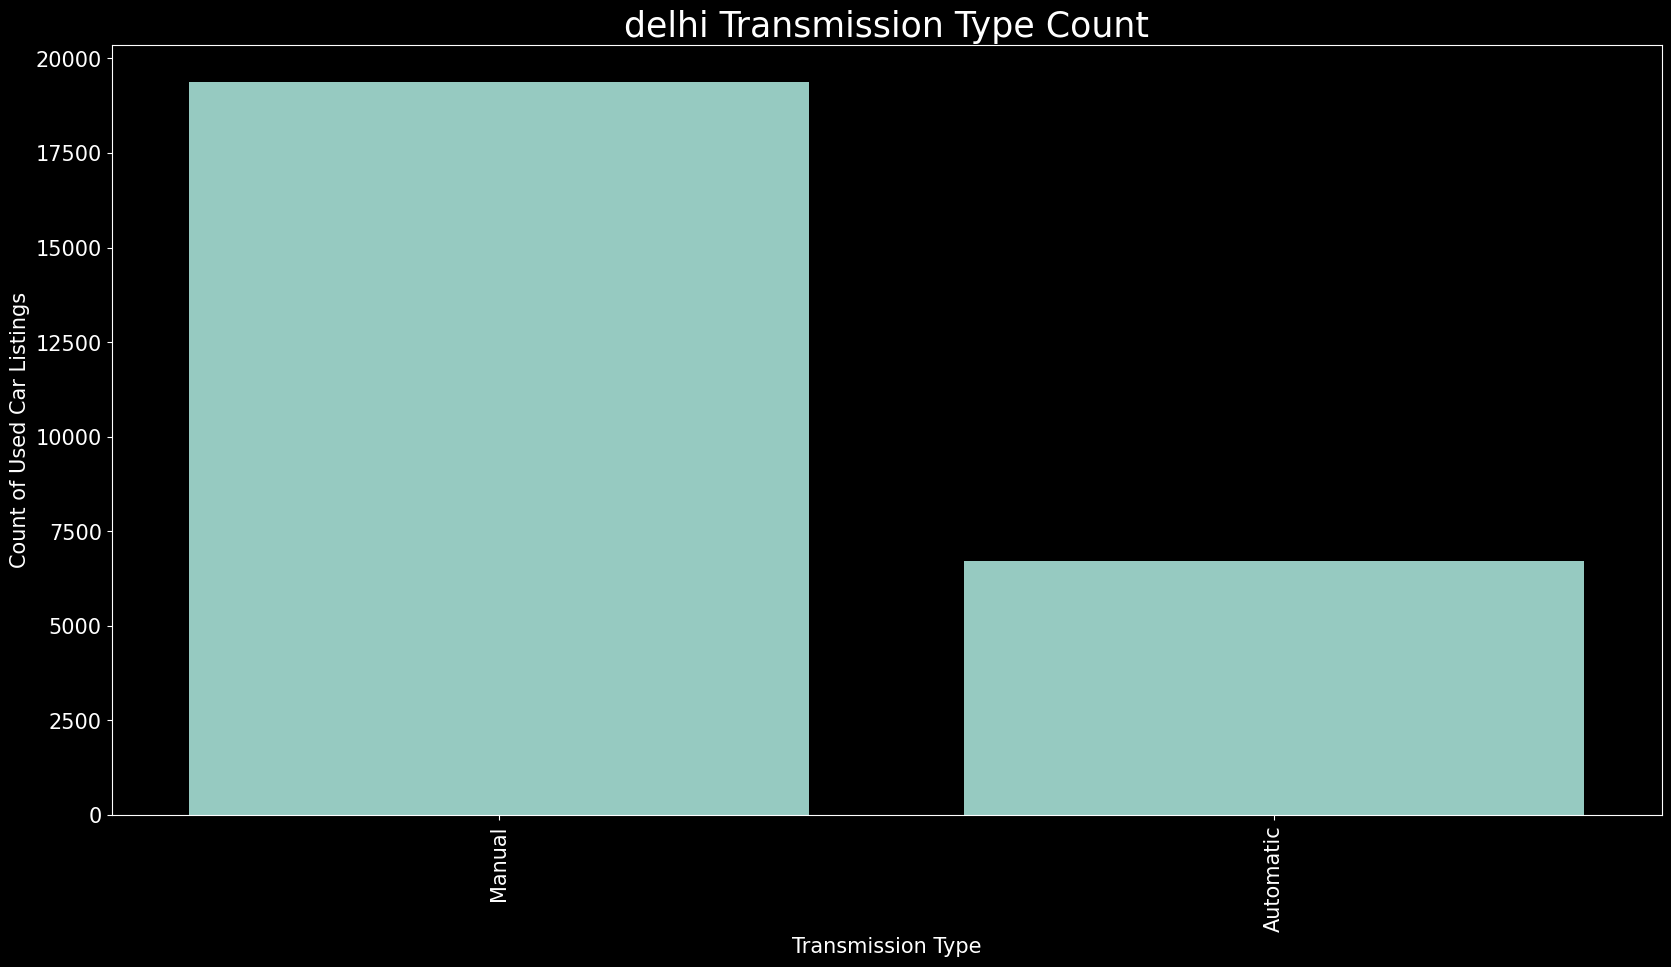

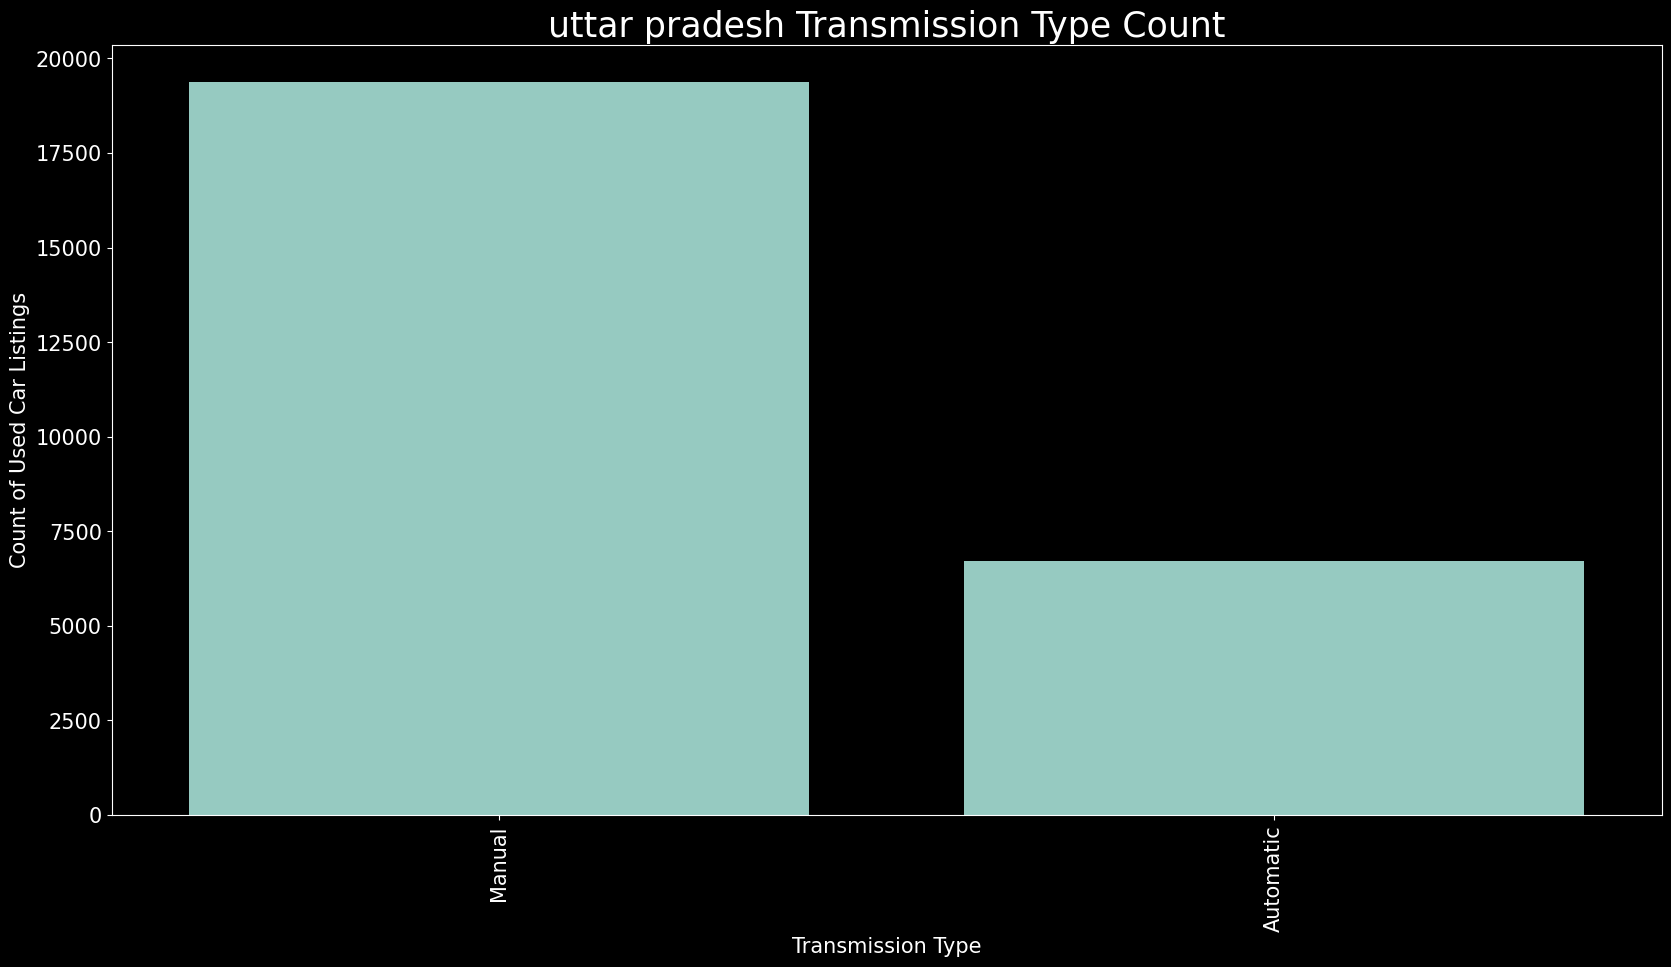

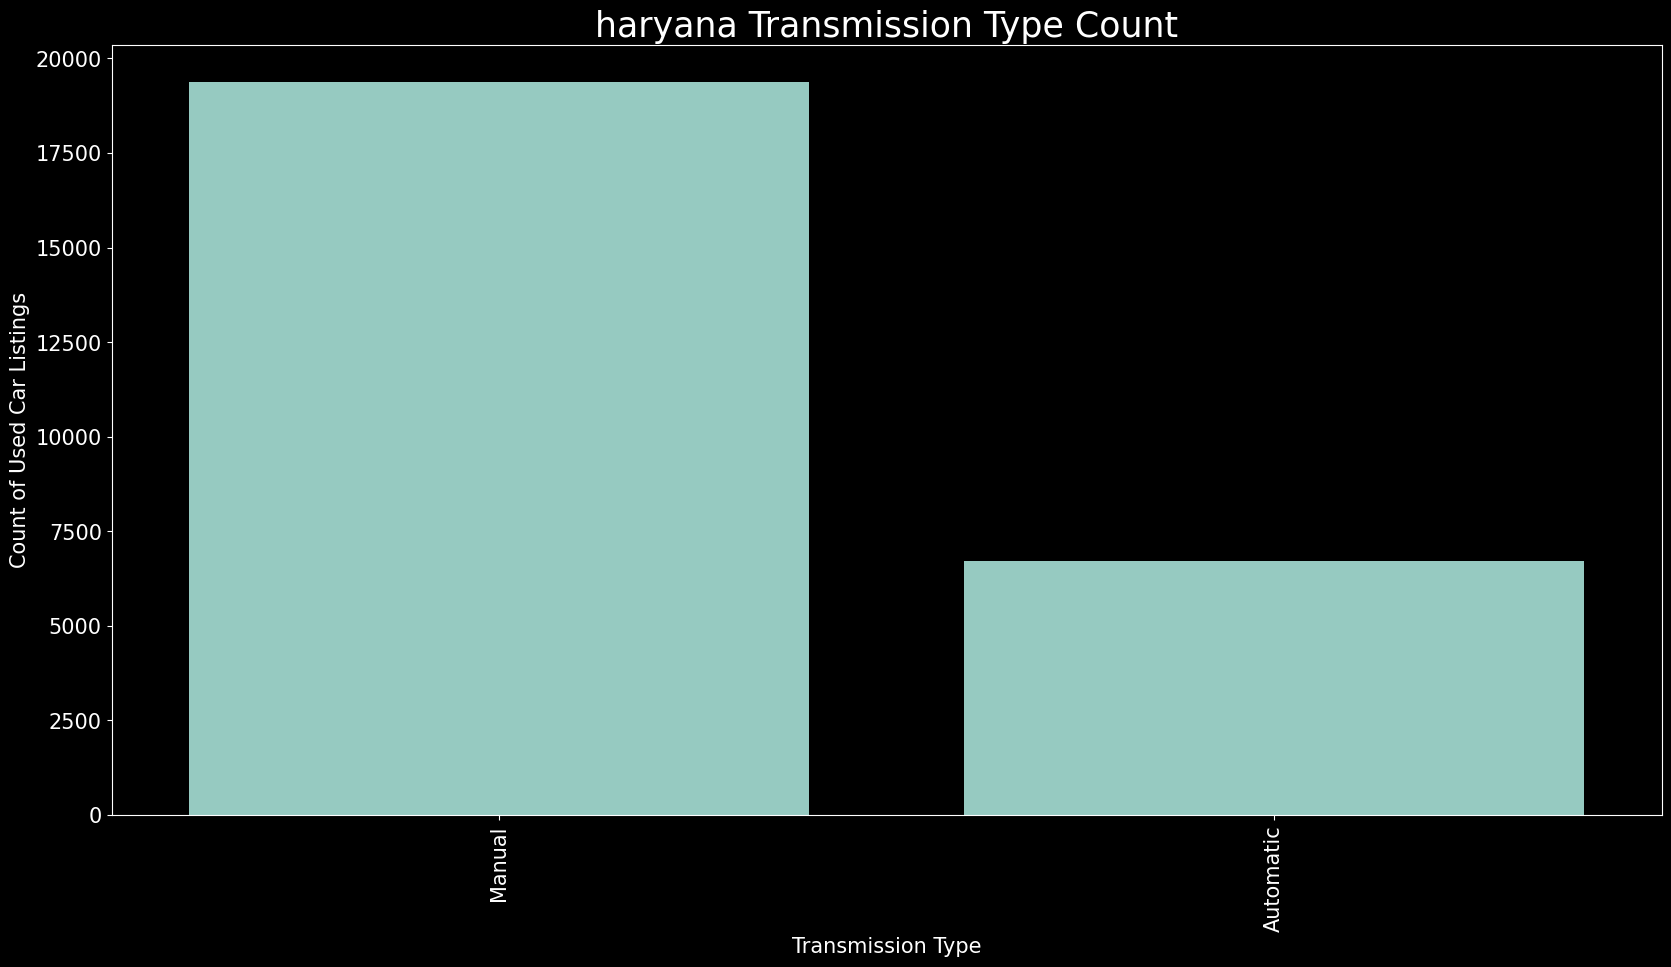

In [146]:
cars_data_clean['Transmission_Type']

top_5_states_data=cars_data_clean[cars_data_clean['state'].isin(list(state_ut_count['state'].head(n=5).values))]
top_5_states_name=list(state_ut_count['state'].head(n=5).values)
top_5_states_name


for state in top_5_states_name:
    top_5_states_data[top_5_states_data['state']==state]
    Transmission_Type_Listings=pd.DataFrame(top_5_states_data['Transmission_Type'].value_counts()).reset_index()

    Transmission_Type_Listings = Transmission_Type_Listings.groupby('Transmission_Type', as_index=False).sum()
    Transmission_Type_Listings=Transmission_Type_Listings.sort_values(by='count',ascending=False)
    Transmission_Type_Listings=Transmission_Type_Listings.head(n=10)

    plt.style.use('dark_background')
    plt.figure(figsize=(20, 10))
    sns.barplot(x='Transmission_Type', y='count', data=Transmission_Type_Listings)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'{state} Transmission Type Count', fontsize=25)
    plt.xlabel('Transmission Type', fontsize=15) 
    plt.ylabel('Count of Used Car Listings', fontsize=15)

    plt.savefig(f'artifacts/plots/{state}_Transmission_Type_Count.jpg', format='jpg')
    plt.show()
    

### Q9 For every body type see the average mileage and see which body type offers the best mileage

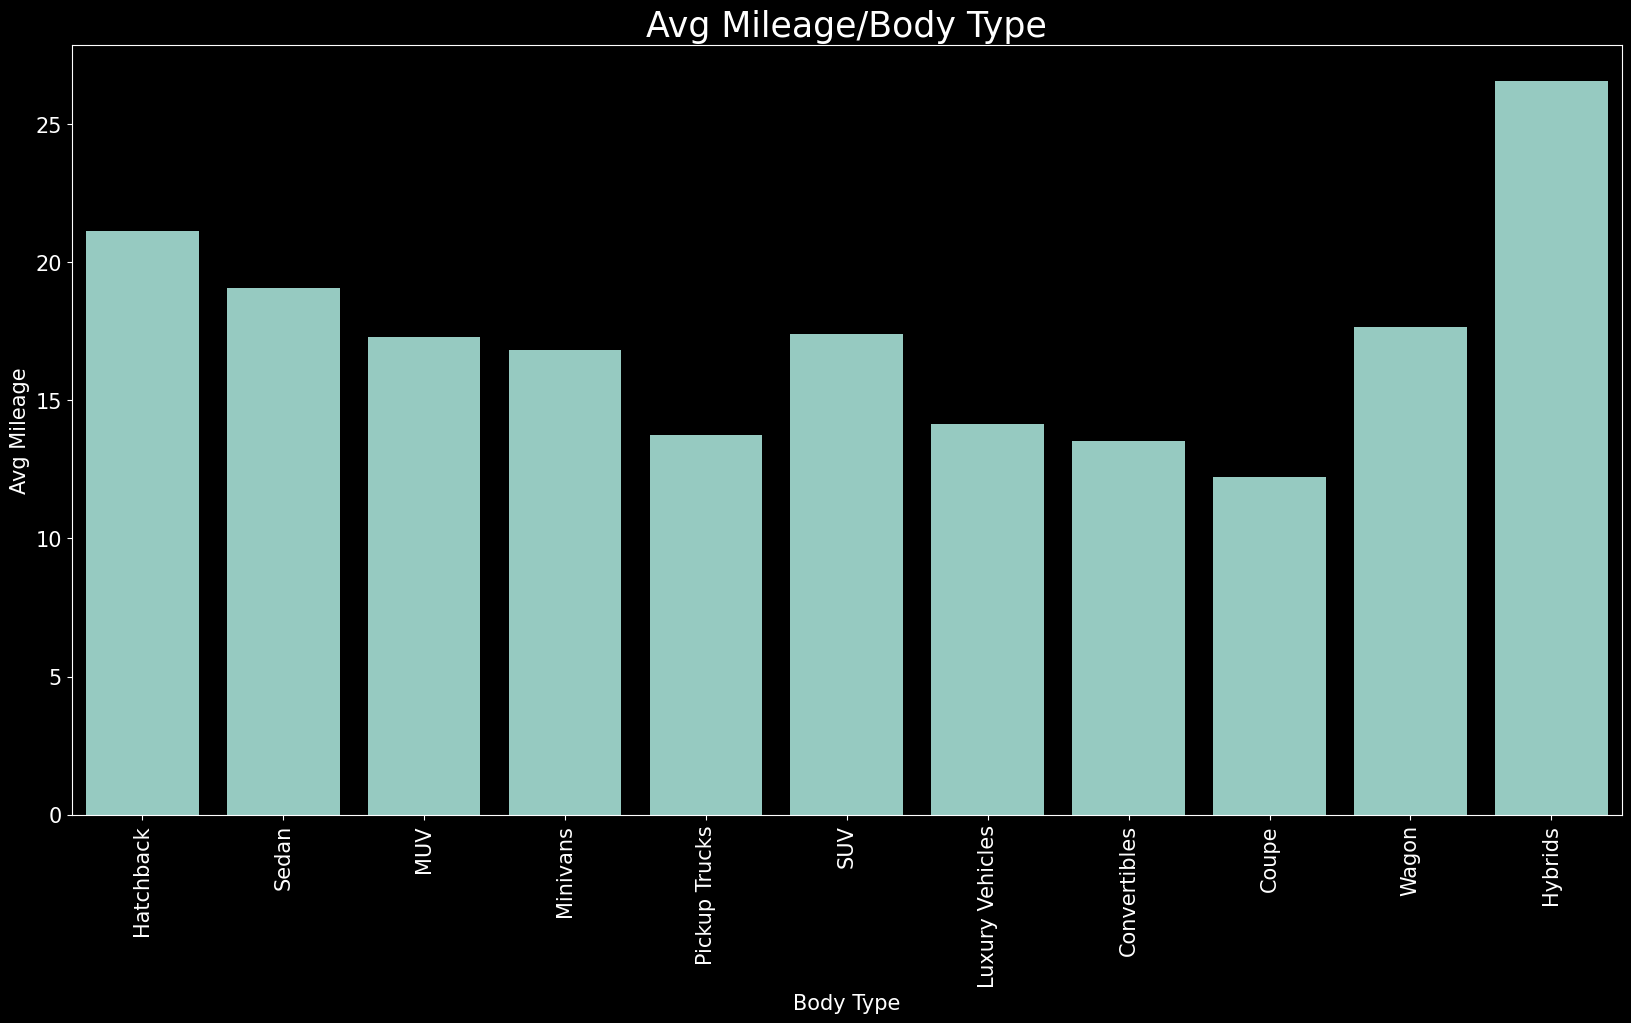

In [147]:
body_types=list(cars_data_clean['Body_Type'].unique())
mileage=[]
for body_type in body_types:
    body_type_data=cars_data_clean[cars_data_clean['Body_Type']==body_type].reset_index()
    body_type_data['mileage']=body_type_data['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
    mean_mileage=np.mean(body_type_data['mileage'])
    mileage.append(mean_mileage)

plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x=body_types, y=mileage)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Avg Mileage/Body Type', fontsize=25)
plt.xlabel('Body Type', fontsize=15) 
plt.ylabel('Avg Mileage', fontsize=15)

plt.savefig(f'artifacts/plots/Avg_Mileage_Per_Body_Type.jpg', format='jpg')
plt.show()

#Hybrids have the best mileage

    

### Q10 For Hatchback cars which model has the best mileage

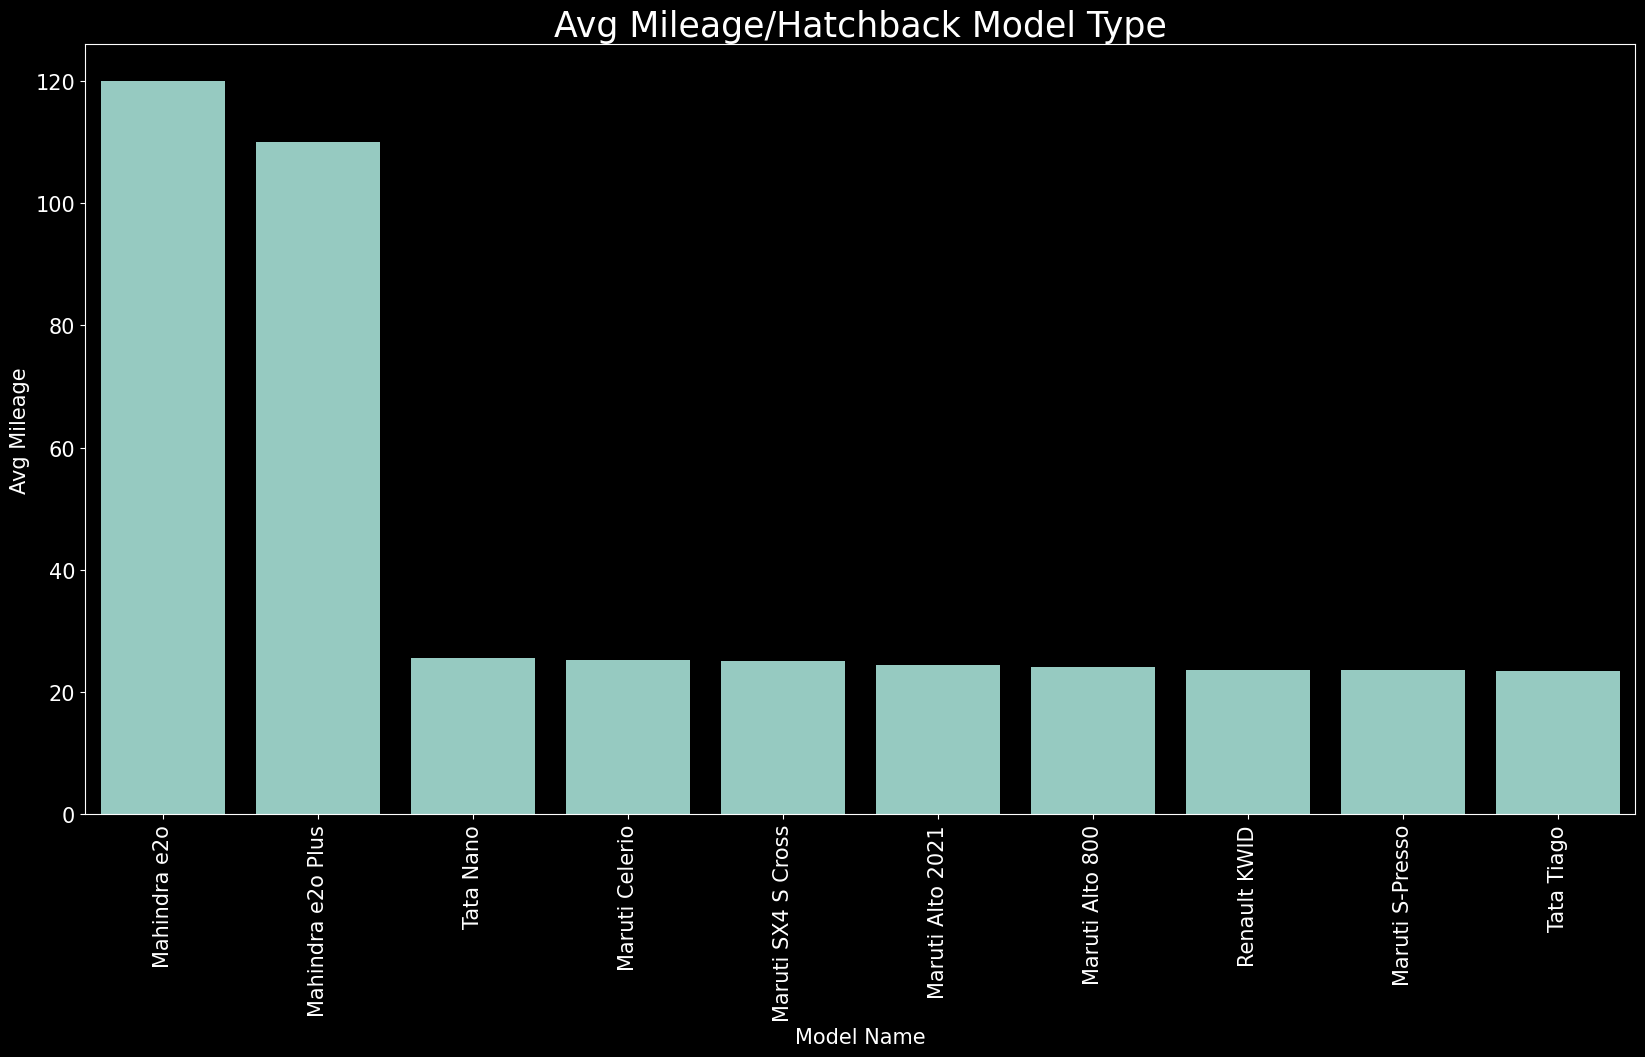

In [148]:
hatchback=cars_data_clean[cars_data_clean['Body_Type']=='Hatchback'].reset_index()


hatchback_models=list(hatchback['model'].unique())
mileage=[]
for hatchback_model in hatchback_models:
    hatchback_model_data=hatchback[hatchback['model']==hatchback_model].reset_index()
    hatchback_model_data['mileage']=hatchback_model_data['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)
    mean_mileage=np.mean(hatchback_model_data['mileage'])
    mileage.append(mean_mileage)


hatchback_avg_mileage = pd.DataFrame({
    'model': hatchback_models,
    'mileage': mileage
})

hatchback_avg_mileage=hatchback_avg_mileage.sort_values(by='mileage', ascending=False).head(10)
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='model', y='mileage',data=hatchback_avg_mileage)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Avg Mileage/Hatchback Model Type', fontsize=25)
plt.xlabel('Model Name', fontsize=15) 
plt.ylabel('Avg Mileage', fontsize=15)
plt.savefig('artifacts/plots/Avg_Mileage_Per_Hatchback_Model.jpg', format='jpg')
#plt.show()

#Mahindra e2o has highest mileage in hatchbacks